In [1]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [93]:
data = pd.read_csv('loan.csv')

### 'data' contains complete information about the loans issued for time period 2007 to 2011.

In [42]:
data.shape

(39717, 111)

In [2]:
# to display all the columns at once

pd.options.display.max_columns = 200

In [44]:
data.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Jump to:- 

1. [Step 1: Data Cleaning](#Step-1:-Data-Cleaning)
2. [Step 2: Univariate Analysis](#Step-2:-Univariate-Analysis)
3. [Step 3: Segmented Univariate Analysis](#Step-3:-Segmented-Univariate-Analysis)
4. [Step 4: Bivariate Analysis](#Step-4:-Bivariate-Analysis)

### Step 1: Data Cleaning

In [95]:
data.id.isna().sum()

0

In [96]:
# number of missing values in each column

num_na_per_col = [data.iloc[:, i].isna().sum() for i, col in enumerate(data)]

In [23]:
num_na_per_col

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2459,
 1075,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 12940,
 0,
 11,
 0,
 0,
 0,
 0,
 0,
 0,
 25682,
 36931,
 0,
 0,
 0,
 50,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 71,
 0,
 38577,
 2,
 56,
 39717,
 0,
 0,
 39717,
 39717,
 39717,
 0,
 39717,
 39717,
 39717,
 39717,
 39717,
 39717,
 39717,
 39717,
 39717,
 39717,
 39717,
 39717,
 39717,
 39717,
 39717,
 39717,
 39717,
 39717,
 39717,
 39717,
 39717,
 56,
 0,
 39717,
 39717,
 39717,
 39717,
 39717,
 39717,
 39717,
 39717,
 39717,
 39717,
 39717,
 39717,
 39717,
 39717,
 39717,
 39717,
 39717,
 39717,
 39717,
 39717,
 39717,
 39717,
 39717,
 39717,
 39717,
 697,
 39,
 39717,
 39717,
 39717,
 39717]

In [97]:
# columns having more than 50% missing values

percent_50 = 50 / 100 * data.shape[0]

na_more_than_50 = list(map(lambda x : True if x >= percent_50 else False, num_na_per_col))

In [98]:
sum(na_more_than_50)

57

- 57 columns having more than 50% missing values
- Dropping these columns is in the best interest of the analysis

In [99]:
cols_to_drop = data.columns[na_more_than_50]

In [53]:
cols_to_drop

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_t

In [100]:
# dropping columns having more than 50 per cent missing values

data.drop(columns= cols_to_drop, inplace= True)

In [101]:
data.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [102]:
# treating remaining missing values in each column one by one

data.columns[data.isna().sum() > 0]

Index(['emp_title', 'emp_length', 'desc', 'title', 'revol_util',
       'last_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

emp_title
- The job title supplied by the Borrower when applying for the loan. *
- \* Employer Title replaces Employer Name for all loans listed after 9/23/2013

In [103]:
data.emp_title.value_counts()

US Army                      134
Bank of America              109
IBM                           66
AT&T                          59
Kaiser Permanente             56
                            ... 
Stone Furniture Co., Inc.      1
Orbitz                         1
O'Connor Safety Corp.          1
US POST OFFICE                 1
Toddler Town Daycare LLC       1
Name: emp_title, Length: 28820, dtype: int64

In [68]:
data.emp_title.shape

(39717,)

In [104]:
data.emp_title.isna().sum()

2459

There are three ways to deal with missing values in 'emp_title' column-
1. Delete the whole column
2. Delete the rows having missing values for this column
3. Use mode to fill the values

According to me, using mode is not an option because the frequency of mode is far less than the missing values so it will create a huge class imbalance for this column. 

Deleting the rows or the column itself are better options.

For deleting the column, we need to make sure that it has very less covariance with target and for deleting the rows we should ensure that target class imbalance will not occur and there are enough samples remaining. Let's do this one by one. 

In [105]:
# checking the values of the target variable without the rows having missing values for 'emp_title' column

data[~data.emp_title.isna()].chargeoff_within_12_mths.describe()

count    37211.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: chargeoff_within_12_mths, dtype: float64

In [106]:
# there seems to be class imbalance for if we remove 'emp_title' missing rows, so proceeding with the same

data = data[~data.emp_title.isna()]

'emp_length'

In [83]:
data.emp_length.value_counts()

10+ years    8535
2 years      4273
< 1 year     4201
3 years      3982
4 years      3357
5 years      3177
1 year       3134
6 years      2158
7 years      1722
8 years      1435
9 years      1228
Name: emp_length, dtype: int64

In [84]:
data.emp_length.isna().sum()

56

In [107]:
# there are only 56 missing values for 'emp_length' column so we can safely remove them

data = data[~data.emp_length.isna()]

'desc' - loan description provided by the borrower

In [86]:
data.desc.value_counts()

In [87]:
data.desc.isna().sum()

12067

My observations for 'desc'-
- it is a categorical column having close to 25000 unique values
- almost all of the remaining values are missing
- because there are so many unique values, it has almost no relation with the target variable

According to my observations, it seems safe to remove this column from the dataset

In [108]:
# dropping the desc column from the dataset

data.drop(columns= 'desc', inplace= True)

'title' - the loan title provided by the borrower

In [110]:
data.title.value_counts()

Debt Consolidation                      2089
Debt Consolidation Loan                 1652
Personal Loan                            632
Consolidation                            501
debt consolidation                       473
                                        ... 
Wedding / House Expenses                   1
Debt Consolidation 720+ Credit Score       1
Requesting funds for vinyl siding          1
Sunroom Loan                               1
ben                                        1
Name: title, Length: 18391, dtype: int64

In [109]:
data.title.isna().sum()

9

In [112]:
# there are only 9 missing values for 'title' column so we can safely remove them

data = data[~data.title.isna()]

'revol_util' - amount of credit the borrower is using relative to all available revolving credit

In [113]:
data.revol_util.describe()

count     37147
unique     1082
top          0%
freq        883
Name: revol_util, dtype: object

In [114]:
data.revol_util.value_counts()

0%        883
0.20%      60
63%        58
66.60%     55
70.40%     55
         ... 
47.36%      1
24.89%      1
27.81%      1
62.31%      1
0.12%       1
Name: revol_util, Length: 1082, dtype: int64

In [115]:
data.revol_util.isna().sum()

46

We have 2 options for 'revol_util' column missing values -
- remove the rows
- use the mode

In [116]:
# there are only 46 missing values, we can safely remove them

data = data[~data.revol_util.isna()]

'last_pymnt_d' - last month payment was received

In [117]:
data.last_pymnt_d.describe()

count      37087
unique       101
top       May-16
freq        1174
Name: last_pymnt_d, dtype: object

In [118]:
data.last_pymnt_d.value_counts()

May-16    1174
Mar-13     967
Dec-14     875
May-13     856
Feb-13     816
          ... 
Apr-08      10
Nov-08      10
Mar-08       5
Jan-08       2
Feb-08       1
Name: last_pymnt_d, Length: 101, dtype: int64

In [119]:
data.last_pymnt_d.isna().sum()

60

In [120]:
# we can use the mode but that may create a class imbalance so we should proceed with remove the rows for this column also

data = data[~data.last_pymnt_d.isna()]

'last_credit_pull_d' - The most recent month LC pulled credit for this loan

In [121]:
data.last_credit_pull_d.describe()

count      37087
unique       106
top       May-16
freq        9727
Name: last_credit_pull_d, dtype: object

In [122]:
data.last_credit_pull_d.value_counts()

May-16    9727
Apr-16    2409
Mar-16    1065
Feb-13     774
Feb-16     693
          ... 
Jun-08       1
Jul-07       1
Jul-08       1
May-07       1
May-08       1
Name: last_credit_pull_d, Length: 106, dtype: int64

In [123]:
data.last_credit_pull_d.isna().sum()

0

There are no missing values for 'last_credit_pull_d' column anymore, they may have been covered in previous data updates

'collections_12_mths_ex_med' - Number of collections in 12 months excluding medical collections

In [124]:
data.collections_12_mths_ex_med.describe()

count    37040.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: collections_12_mths_ex_med, dtype: float64

In [126]:
data.collections_12_mths_ex_med.isna().sum()

47

In [135]:
# there are 47 missing values and its a numeric column so replacing them with mean of the column

data.collections_12_mths_ex_med.fillna(data.collections_12_mths_ex_med.mean(), inplace= True)

'chargeoff_within_12_mths' - Number of charge-offs within 12 months

In [137]:
data.chargeoff_within_12_mths.describe()

count    37040.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: chargeoff_within_12_mths, dtype: float64

In [138]:
data.chargeoff_within_12_mths.value_counts()

0.0    37040
Name: chargeoff_within_12_mths, dtype: int64

In [140]:
data.chargeoff_within_12_mths.isna().sum()

47

In [141]:
# 47 missing values in a numeric column, replacing it with mean

data.chargeoff_within_12_mths.fillna(data.chargeoff_within_12_mths.mean(), inplace= True)

'pub_rec_bankruptcies' - Number of public record bankruptcies

In [144]:
data.pub_rec_bankruptcies.describe()

count    36433.000000
mean         0.041418
std          0.200221
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

In [145]:
data.pub_rec_bankruptcies.value_counts()

0.0    34931
1.0     1495
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [146]:
data.pub_rec_bankruptcies.isna().sum()

654

In [147]:
data.shape[0]

37087

In [148]:
# Replace the 654 missing values with mode will increase the class imbalance even further
# so removing the rows seems to be the better option. 

data = data[~data.pub_rec_bankruptcies.isna()]

'tax_liens' - Number of tax liens

In [150]:
data.tax_liens.describe()

count    36433.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: tax_liens, dtype: float64

In [151]:
data.tax_liens.value_counts()

0.0    36433
Name: tax_liens, dtype: int64

In [152]:
data.tax_liens.isna().sum()

0

The missing values for 'tax_liens' were handled in previous updates

In [155]:
# ZERO MISSING VALUES

data.isna().sum().sum()

0

### All the missing values were handled

In [156]:
data.to_csv('loan_without_na.csv')

In [2]:
data = pd.read_csv('loan_without_na.csv')

In [4]:
data.head(3)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [3]:
data.drop(columns= 'Unnamed: 0', inplace= True)

In [9]:
data.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


We need to deal with 3 more steps to clean the data, which are-
- Standardising values
- Managing invalid values
- Filtering Data

In [17]:
data.id.describe()

count    3.643300e+04
mean     6.909826e+05
std      2.026435e+05
min      5.574200e+04
25%      5.226860e+05
50%      6.705630e+05
75%      8.399030e+05
max      1.077430e+06
Name: id, dtype: float64

In [19]:
data.id.value_counts()

464899     1
774927     1
404561     1
1028867    1
584456     1
          ..
546240     1
830911     1
572861     1
650679     1
842708     1
Name: id, Length: 36433, dtype: int64

'id' is a categorical variable and each value is unique

In [20]:
data.member_id.describe()

count    3.643300e+04
mean     8.610707e+05
std      2.538822e+05
min      1.124930e+05
25%      6.755300e+05
50%      8.569510e+05
75%      1.049791e+06
max      1.314167e+06
Name: member_id, dtype: float64

In [21]:
data.member_id.value_counts()

399649     1
696993     1
1204889    1
1028886    1
936604     1
          ..
709840     1
865484     1
1053896    1
687301     1
864250     1
Name: member_id, Length: 36433, dtype: int64

'member_id' is also a categorical value and each value is unique

In [22]:
data.loan_amnt.describe()

count    36433.000000
mean     11307.679851
std       7433.859357
min        500.000000
25%       5600.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [24]:
data.loan_amnt.value_counts()

10000    2610
12000    2198
5000     1843
6000     1767
15000    1757
         ... 
17075       1
19250       1
20450       1
21425       1
28750       1
Name: loan_amnt, Length: 863, dtype: int64

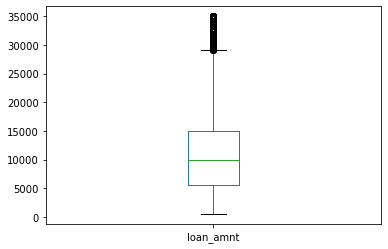

In [28]:
data.loan_amnt.plot.box()
plt.show()

loan_amnt is a numerical variable having many unique values and there are outliers which we will handle later, but right now, there does not seem to be any invalid values or incorrect format of the values. Moving on to the next variable. 

In [29]:
data.funded_amnt.describe()

count    36433.000000
mean     11032.834244
std       7166.484281
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

In [30]:
data.funded_amnt.value_counts()

10000    2524
12000    2113
5000     1832
6000     1755
15000    1650
         ... 
25400       1
21150       1
500         1
2325        1
28750       1
Name: funded_amnt, Length: 1024, dtype: int64

The describe function worked fine for this variable also, proceeding with the next variable

In [31]:
data.funded_amnt_inv.describe()

count    36433.000000
mean     10601.325781
std       7072.842604
min          0.000000
25%       5000.000000
50%       9202.846434
75%      14508.454150
max      35000.000000
Name: funded_amnt_inv, dtype: float64

In [32]:
data.funded_amnt_inv.value_counts()

5000.000000     1201
10000.000000    1197
6000.000000     1125
12000.000000    1026
8000.000000      834
                ... 
11717.381490       1
8995.508027        1
707.240683         1
19483.036810       1
19752.946720       1
Name: funded_amnt_inv, Length: 7474, dtype: int64

funded_amnt_inv is the amount of loan the investors committed for that loan.

In [34]:
data.term.describe()

count          36433
unique             2
top        36 months
freq           26377
Name: term, dtype: object

In [35]:
data.term.value_counts()

 36 months    26377
 60 months    10056
Name: term, dtype: int64

term is an ordered catergorical variable only having 2 unique values. We can remove the word 'months' from the value and make it a numerical variable but that won't accomplish anything in particular. So, leaving this variable and moving on to the next one. 

In [36]:
data.int_rate.describe()

count      36433
unique       334
top       10.99%
freq         901
Name: int_rate, dtype: object

In [37]:
data.int_rate.value_counts()

10.99%    901
13.49%    785
11.49%    768
7.51%     731
7.88%     674
         ... 
22.94%      1
9.01%       1
10.46%      1
11.22%      1
16.01%      1
Name: int_rate, Length: 334, dtype: int64

int_rate should be a numerical variable but is an object because of the percent sign in the values. We will remove the percent sign and make it a numerical variable so that we can do better analysis using it. 

In [4]:
data.int_rate = data.int_rate.apply(lambda x : float(x[:-1]))

In [5]:
data.rename(columns={'int_rate':'int_rate (%)'}, inplace= True)

In [6]:
data.rename(columns={'int_rate (%)':'int_rate_percent'}, inplace= True)

In [7]:
data.int_rate_percent.describe()

count    36433.000000
mean        12.073862
std          3.734758
min          5.420000
25%          9.320000
50%         11.860000
75%         14.650000
max         24.400000
Name: int_rate_percent, dtype: float64

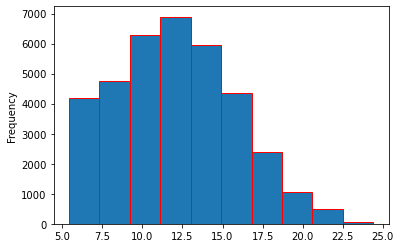

In [111]:
data.int_rate_percent.plot.hist(edgecolor= 'red')
plt.show()

int_rate_percent seems to work fine now, moving on.

In [47]:
data.installment.describe()

count    36433.000000
mean       326.186394
std        207.389943
min         16.080000
25%        168.900000
50%        283.280000
75%        432.220000
max       1305.190000
Name: installment, dtype: float64

In [48]:
data.installment.value_counts()

311.11    65
311.02    53
180.96    52
150.80    43
368.45    43
          ..
89.85      1
227.60     1
198.65     1
75.85      1
339.26     1
Name: installment, Length: 14367, dtype: int64

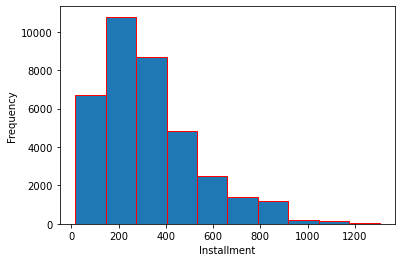

In [51]:
data.installment.plot.hist(edgecolor='red')
plt.xlabel('Installment')
plt.show()

installment is working fine, moving on.

In [52]:
data.grade.describe()

count     36433
unique        7
top           B
freq      11035
Name: grade, dtype: object

In [53]:
data.grade.value_counts()

B    11035
A     9175
C     7431
D     4875
E     2650
F      969
G      298
Name: grade, dtype: int64

grade is an ordered categorical variable with no special values to handle, the column is free of invalid values. Moving on. 

In [54]:
data.sub_grade.describe()

count     36433
unique       35
top          B3
freq       2674
Name: sub_grade, dtype: object

In [58]:
data.sub_grade.value_counts().sort_index()

A1    1005
A2    1356
A3    1630
A4    2673
A5    2511
B1    1643
B2    1870
B3    2674
B4    2319
B5    2529
C1    1949
C2    1870
C3    1406
C4    1124
C5    1082
D1     846
D2    1245
D3    1078
D4     905
D5     801
E1     729
E2     606
E3     516
E4     423
E5     376
F1     315
F2     230
F3     170
F4     151
F5     103
G1      98
G2      75
G3      44
G4      56
G5      25
Name: sub_grade, dtype: int64

For each unique value of grade, there are 5 values in sub_grade. We can check if the count of each unique of grade is equal to the sum of count of all sub grades for that value. 

In [66]:
# A
data[data.grade == 'A'].sub_grade.value_counts()

A4    2673
A5    2511
A3    1630
A2    1356
A1    1005
Name: sub_grade, dtype: int64

In [65]:
# B
data[data.grade == 'B'].sub_grade.value_counts()

B3    2674
B5    2529
B4    2319
B2    1870
B1    1643
Name: sub_grade, dtype: int64

In [67]:
# C
data[data.grade == 'C'].sub_grade.value_counts()

C1    1949
C2    1870
C3    1406
C4    1124
C5    1082
Name: sub_grade, dtype: int64

In [68]:
# D
data[data.grade == 'D'].sub_grade.value_counts()

D2    1245
D3    1078
D4     905
D1     846
D5     801
Name: sub_grade, dtype: int64

In [69]:
# E
data[data.grade == 'E'].sub_grade.value_counts()

E1    729
E2    606
E3    516
E4    423
E5    376
Name: sub_grade, dtype: int64

In [70]:
# F
data[data.grade == 'F'].sub_grade.value_counts()

F1    315
F2    230
F3    170
F4    151
F5    103
Name: sub_grade, dtype: int64

In [71]:
# G
data[data.grade == 'G'].sub_grade.value_counts()

G1    98
G2    75
G4    56
G3    44
G5    25
Name: sub_grade, dtype: int64

grades and sub_grades columns can be merged but that will result in a loss of information for us. Let's leave them as it is for now.

In [72]:
data.emp_title.describe()

count       36433
unique      28207
top       US Army
freq          131
Name: emp_title, dtype: object

In [73]:
data.emp_title.value_counts()

US Army                              131
Bank of America                      108
IBM                                   66
AT&T                                  59
Kaiser Permanente                     55
                                    ... 
Lifequote                              1
west herr automotive group             1
Wellington Management Company LLP      1
Kinetic Books                          1
J.M. Smucker Company                   1
Name: emp_title, Length: 28207, dtype: int64

Every value in emp_title is an identifier for a company. Let's proceed

In [74]:
data.emp_length.describe()

count         36433
unique           11
top       10+ years
freq           8407
Name: emp_length, dtype: object

In [75]:
data.emp_length.value_counts()

10+ years    8407
2 years      4178
< 1 year     4052
3 years      3914
4 years      3297
5 years      3129
1 year       3026
6 years      2121
7 years      1697
8 years      1405
9 years      1207
Name: emp_length, dtype: int64

The description for emp_length from data dictionary says-
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

Based on above information, lets make following changes-
1. remove 'years' from values
2. rename 10+ to 10
3. rename < 1 to 0
4. convert the values to integer

In [8]:
data.emp_length = data.emp_length.apply(lambda x : '0 years' if x == '< 1 year' else x)

In [9]:
data.emp_length = data.emp_length.apply(lambda x : '10 years' if x == '10+ years' else x)

In [10]:
data.emp_length = data.emp_length.apply(lambda x : '1 years' if x == '1 year' else x)

In [11]:
data.emp_length = data.emp_length.apply(lambda x : int(x[:-6]))

In [126]:
data.emp_length.describe()

count    36433.000000
mean         5.015645
std          3.542914
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

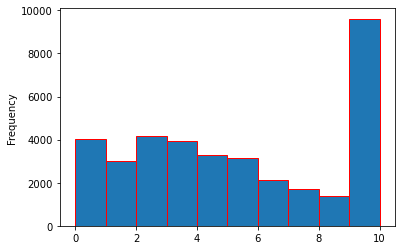

In [166]:
data.emp_length.plot.hist(edgecolor='red')
plt.show()

In [133]:
data.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate_percent,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [134]:
data.home_ownership.describe()

count     36433
unique        4
top        RENT
freq      17464
Name: home_ownership, dtype: object

In [135]:
data.home_ownership.value_counts()

RENT        17464
MORTGAGE    16300
OWN          2575
OTHER          94
Name: home_ownership, dtype: int64

'home_ownership' is an unordered categorical variable which has 4 unique values. No invalid value is detected, proceeding with the next variable.

In [136]:
data.annual_inc.describe()

count    3.643300e+04
mean     6.930522e+04
std      6.354244e+04
min      4.000000e+03
25%      4.200000e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [167]:
data.annual_inc.value_counts()

60000.0     1367
50000.0      958
40000.0      801
45000.0      764
65000.0      758
            ... 
41053.0        1
112008.0       1
64704.0        1
61938.0        1
140900.0       1
Name: annual_inc, Length: 4924, dtype: int64

annual_inc has lot of unique values so we can-
- categorize them in bins which will place all high values in last bin
- remove the outliers and don't make bins

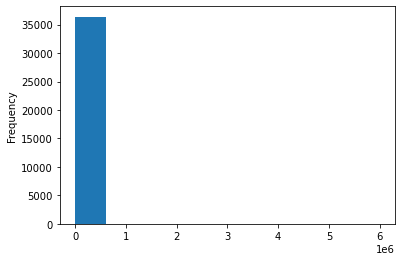

In [168]:
data.annual_inc.plot.hist()
plt.show()

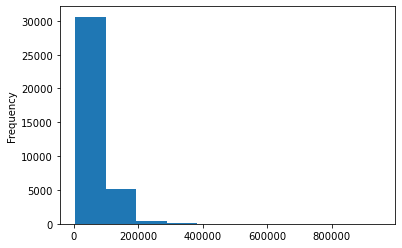

In [169]:
data[data.annual_inc < 1e6].annual_inc.plot.hist()
plt.show()

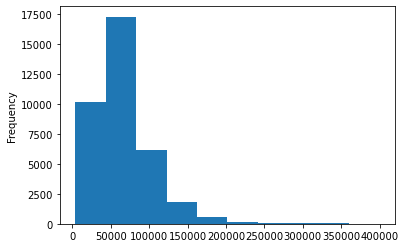

In [170]:
data[data.annual_inc < 0.4e6].annual_inc.plot.hist()
plt.show()

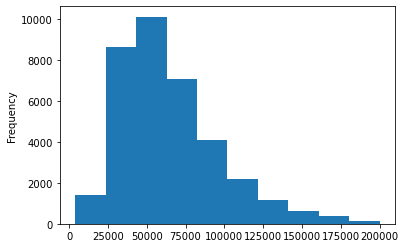

In [171]:
data[data.annual_inc < 0.2e6].annual_inc.plot.hist()
plt.show()

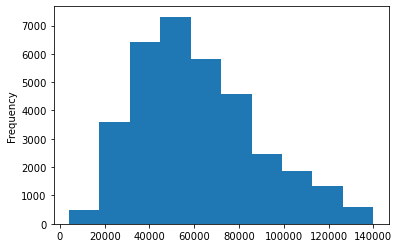

In [175]:
data[data.annual_inc < 0.14e6].annual_inc.plot.hist()
plt.show()

The outlier values seems legitimate to me, people do have high incomes. I think removing the outliers will lead to loss of crucial information about high income samples in the dataset which will introduce bias in the dataset towards lower income profiles. 

The number of samples with high income are less so we can just place all of them in one bin and likewise, categorize all the values into bins of equal size. 

This approach will allow us to save information that the data holds.

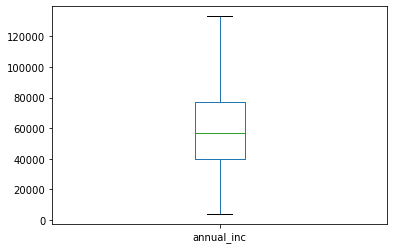

In [181]:
# this is the value of annual_inc which shows zero outliers. 

data[data.annual_inc < 0.133e6].annual_inc.plot.box()
plt.show()

In [192]:
data[data.annual_inc > 130000].shape[0]

2264

Let's divide the annual_inc column into 5 bins from 0 to 130000. All the outlier values will be in the last bin. 

In [12]:
# making bins to categorize annual_inc values

bin_size = 26000
annual_income_bins = [i * bin_size for i in range(1, 6)]

In [13]:
# function to assign categories to each sample

def decideBin(a):
    for bin_ in annual_income_bins:
        if ((bin_ < annual_income_bins[-1]) and (a <= bin_)):
            return bin_
        elif (bin_ == annual_income_bins[-1]):
            return bin_

In [14]:
data['annual_inc_categorical'] = data.annual_inc.apply(decideBin)

In [17]:
data.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate_percent,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,annual_inc_categorical
0,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,52000
1,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,52000
2,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,104000


#### Note: I will decide whether I want to remove the original annual_inc column after some consultation with teacher assistants. 

In [18]:
data.verification_status.describe()

count            36433
unique               3
top       Not Verified
freq             15056
Name: verification_status, dtype: object

In [19]:
data.verification_status.value_counts()

Not Verified       15056
Verified           11926
Source Verified     9451
Name: verification_status, dtype: int64

In [20]:
data.issue_d.describe()

count      36433
unique        52
top       Dec-11
freq        2126
Name: issue_d, dtype: object

In [22]:
data.issue_d.head(3)

0    Dec-11
1    Dec-11
2    Dec-11
Name: issue_d, dtype: object

In [23]:
from datetime import datetime

In [40]:
data['issue_d_month'] = data.issue_d.apply(lambda x : datetime.strptime(x, '%b-%y').month)

In [41]:
data['issue_d_year'] = data.issue_d.apply(lambda x : datetime.strptime(x, '%b-%y').year)

In [43]:
data.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate_percent,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,annual_inc_categorical,issue_d_month,issue_d_year
0,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,52000,12,2011
1,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,52000,12,2011
2,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,104000,12,2011


In [44]:
data.loan_status.describe()

count          36433
unique             3
top       Fully Paid
freq           30424
Name: loan_status, dtype: object

In [45]:
data.loan_status.value_counts()

Fully Paid     30424
Charged Off     4943
Current         1066
Name: loan_status, dtype: int64

In [46]:
data.pymnt_plan.describe()

count     36433
unique        1
top           n
freq      36433
Name: pymnt_plan, dtype: object

In [47]:
data.pymnt_plan.value_counts()

n    36433
Name: pymnt_plan, dtype: int64

In [48]:
data.url.describe()

count                                                 36433
unique                                                36433
top       https://lendingclub.com/browse/loanDetail.acti...
freq                                                      1
Name: url, dtype: object

In [49]:
data.url.value_counts()

https://lendingclub.com/browse/loanDetail.action?loan_id=775533    1
https://lendingclub.com/browse/loanDetail.action?loan_id=739681    1
https://lendingclub.com/browse/loanDetail.action?loan_id=690882    1
https://lendingclub.com/browse/loanDetail.action?loan_id=601348    1
https://lendingclub.com/browse/loanDetail.action?loan_id=717383    1
                                                                  ..
https://lendingclub.com/browse/loanDetail.action?loan_id=619187    1
https://lendingclub.com/browse/loanDetail.action?loan_id=366567    1
https://lendingclub.com/browse/loanDetail.action?loan_id=513213    1
https://lendingclub.com/browse/loanDetail.action?loan_id=719577    1
https://lendingclub.com/browse/loanDetail.action?loan_id=971239    1
Name: url, Length: 36433, dtype: int64

In [52]:
data.id[0]

1077430

In [53]:
data.url[0]

'https://lendingclub.com/browse/loanDetail.action?loan_id=1077430'

The url is unique for each sample and the difference in each of them is the id, which itself is a column. This means that all we can take out from the url is the id and we already have the id. This makes the url column redundant. 

In [55]:
data.purpose.describe()

count                  36433
unique                    14
top       debt_consolidation
freq                   17470
Name: purpose, dtype: object

In [56]:
data.purpose.value_counts()

debt_consolidation    17470
credit_card            4726
other                  3575
home_improvement       2705
major_purchase         2008
car                    1443
small_business         1414
wedding                 886
medical                 634
moving                  529
house                   343
vacation                336
educational             276
renewable_energy         88
Name: purpose, dtype: int64

In [57]:
data.title.describe()

count                  36433
unique                 17954
top       Debt Consolidation
freq                    2064
Name: title, dtype: object

In [58]:
data.title.value_counts()

Debt Consolidation                   2064
Debt Consolidation Loan              1644
Personal Loan                         607
Consolidation                         488
debt consolidation                    467
                                     ... 
Debt Consolidation - Improve FICO       1
Inventory                               1
loaney                                  1
TFLoan2009                              1
Viva Las Vegas Wedding                  1
Name: title, Length: 17954, dtype: int64

'purpose' and 'title' category are pretty similar. 'purpose' means a category provided by the borrower for the loan request whereas 'title' means the loan title provided by the borrower. 

The values in the 'purpose' column are exclusive whereas title has so many unique values and using this column for the analysis does not seem logical because it contains a lot of noise. We can use purpose column for the same work because it has far less noise.

Anyways, these two columns does not need any modification right now, we may exclude 'title' at the time of analysis.

In [60]:
data.zip_code.describe()

count     36433
unique      806
top       100xx
freq        540
Name: zip_code, dtype: object

In [61]:
data.zip_code.value_counts()

100xx    540
945xx    508
112xx    480
606xx    477
070xx    440
        ... 
736xx      1
461xx      1
388xx      1
096xx      1
663xx      1
Name: zip_code, Length: 806, dtype: int64

The zip code column contains first three numbers of the zip code provided by the borrower. We may use to approximate the location of customers. So, let's first do some modifications-
- remove 'xx' from every sample because it does not mean any thing for us and its common to every value.

In [64]:
data.zip_code = data.zip_code.apply(lambda x : x[:-2])

In [65]:
data.zip_code.describe()

count     36433
unique      806
top         100
freq        540
Name: zip_code, dtype: object

In [66]:
data.addr_state.describe()

count     36433
unique       49
top          CA
freq       6536
Name: addr_state, dtype: object

In [68]:
data.addr_state.value_counts()

CA    6536
NY    3494
FL    2616
TX    2516
NJ    1723
IL    1426
PA    1417
VA    1297
GA    1291
MA    1222
OH    1138
MD     974
AZ     783
WA     741
CO     707
NC     704
CT     678
MI     656
MO     624
MN     563
NV     460
SC     435
AL     413
OR     412
WI     406
LA     398
KY     306
OK     283
KS     249
UT     234
AR     225
DC     206
RI     189
NM     167
WV     161
HI     161
NH     151
DE     106
WY      78
AK      75
MT      73
SD      57
VT      48
MS      18
TN      10
ID       3
IA       1
IN       1
NE       1
Name: addr_state, dtype: int64

In [69]:
data.dti.describe()

count    36433.000000
mean        13.444131
std          6.643308
min          0.000000
25%          8.360000
50%         13.540000
75%         18.690000
max         29.990000
Name: dti, dtype: float64

In [71]:
data.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate_percent,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,annual_inc_categorical,issue_d_month,issue_d_year
0,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,52000,12,2011
1,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,52000,12,2011
2,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,104000,12,2011


In [72]:
data.delinq_2yrs.describe()

count    36433.000000
mean         0.146131
std          0.492199
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: delinq_2yrs, dtype: float64

In [73]:
data.delinq_2yrs.value_counts()

0     32486
1      3028
2       628
3       197
4        55
5        21
6        10
7         4
8         2
9         1
11        1
Name: delinq_2yrs, dtype: int64

In [74]:
data.earliest_cr_line.describe()

count      36433
unique       510
top       Nov-98
freq         353
Name: earliest_cr_line, dtype: object

In [76]:
data['earliest_cr_line_month'] = data.earliest_cr_line.apply(lambda x : datetime.strptime(x, '%b-%y').month)
data['earliest_cr_line_year'] = data.earliest_cr_line.apply(lambda x : datetime.strptime(x, '%b-%y').year)

In [77]:
data.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate_percent,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,annual_inc_categorical,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year
0,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,52000,12,2011,4,1999
1,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,52000,12,2011,2,1996
2,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,104000,12,2011,1,1996


In [78]:
data.inq_last_6mths.describe()

count    36433.00000
mean         0.86493
std          1.06343
min          0.00000
25%          0.00000
50%          1.00000
75%          1.00000
max          8.00000
Name: inq_last_6mths, dtype: float64

In [79]:
data.inq_last_6mths.value_counts()

0    17729
1    10065
2     5363
3     2762
4      290
5      125
6       55
7       32
8       12
Name: inq_last_6mths, dtype: int64

In [80]:
data.open_acc.describe()

count    36433.000000
mean         9.351604
std          4.373772
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64

In [82]:
data.pub_rec.describe()

count    36433.000000
mean         0.053715
std          0.234995
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: pub_rec, dtype: float64

In [83]:
data.pub_rec.value_counts()

0    34543
1     1834
2       47
3        7
4        2
Name: pub_rec, dtype: int64

In [84]:
data.revol_bal.describe()

count     36433.000000
mean      13465.657481
std       15702.093047
min           0.000000
25%        3832.000000
50%        9030.000000
75%       17231.000000
max      149588.000000
Name: revol_bal, dtype: float64

In [85]:
data.revol_bal.value_counts()

0        840
1         11
10         9
1763       9
39         9
        ... 
34934      1
29564      1
25470      1
60303      1
39107      1
Name: revol_bal, Length: 20790, dtype: int64

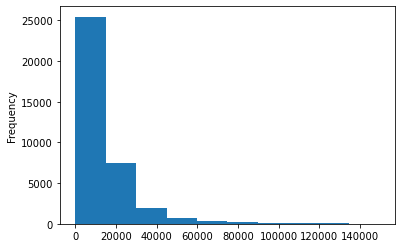

In [86]:
data.revol_bal.plot.hist()
plt.show()

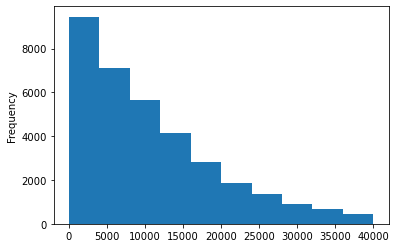

In [90]:
data[data.revol_bal < 40000].revol_bal.plot.hist()
plt.show()

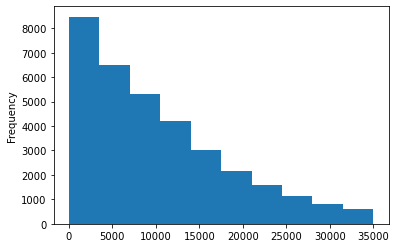

In [91]:
data[data.revol_bal < 35000].revol_bal.plot.hist()
plt.show()

'revol_bal' has lots of outliers which are equally informative about the data, so we can make this numeric column a ordered categorical column. 

In [94]:
data[data.revol_bal > 30000].revol_bal.shape[0]

3470

Lets divide it into bins of size 10000

In [97]:
revol_bal_binsize = [10000 * i for i in range(1, 4)]

In [98]:
revol_bal_binsize

[10000, 20000, 30000]

In [100]:
def decideBin2(x):
    for bin_ in revol_bal_binsize:
        if (x <= bin_) and (bin_ < revol_bal_binsize[-1]):
            return bin_
        elif bin_ == revol_bal_binsize[-1]:
            return bin_

In [104]:
data['revol_bal_categorical'] = data.revol_bal.apply(decideBin2)

In [105]:
data.revol_util.describe()

count     36433
unique     1082
top          0%
freq        852
Name: revol_util, dtype: object

In [106]:
data.revol_util.value_counts()

0%        852
0.20%      58
70.40%     55
61%        55
66.60%     55
         ... 
24.65%      1
46.74%      1
7.28%       1
28.41%      1
37.63%      1
Name: revol_util, Length: 1082, dtype: int64

In [109]:
data.revol_util = data.revol_util.apply(lambda x : float(x[:-1]))

In [110]:
data.revol_util.describe()

count    36433.000000
mean        49.276251
std         28.191811
min          0.000000
25%         26.100000
50%         49.900000
75%         72.700000
max         99.900000
Name: revol_util, dtype: float64

In [111]:
data.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate_percent,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,annual_inc_categorical,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,revol_bal_categorical
0,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,52000,12,2011,4,1999,10000
1,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,52000,12,2011,2,1996,10000
2,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972,OR,17.94,0,Jan-96,0,15,0,27783,53.9,38,f,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,104000,12,2011,1,1996,30000


In [112]:
data.total_acc.describe()

count    36433.000000
mean        22.245876
std         11.376692
min          2.000000
25%         14.000000
50%         21.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64

In [113]:
data.initial_list_status.describe()

count     36433
unique        1
top           f
freq      36433
Name: initial_list_status, dtype: object

In [114]:
data.out_prncp.describe()

count    36433.000000
mean        52.465692
std        379.850844
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       6311.470000
Name: out_prncp, dtype: float64

In [116]:
data.out_prncp_inv.describe()

count    36433.000000
mean        52.213313
std        378.443825
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       6307.370000
Name: out_prncp_inv, dtype: float64

In [117]:
data.total_pymnt.describe()

count    36433.000000
mean     12310.968657
std       9048.420885
min         33.730000
25%       5672.557913
50%      10101.589360
75%      16700.719980
max      58563.679930
Name: total_pymnt, dtype: float64

In [119]:
data.total_rec_prncp.describe()

count    36433.000000
mean      9912.408471
std       7053.212865
min          0.000000
25%       4800.000000
50%       8123.600000
75%      14000.000000
max      35000.020000
Name: total_rec_prncp, dtype: float64

In [120]:
data.total_rec_int.describe()

count    36433.000000
mean      2304.404937
std       2629.542911
min          6.220000
25%        678.010000
50%       1379.820000
75%       2891.860000
max      23563.680000
Name: total_rec_int, dtype: float64

In [121]:
data.total_rec_late_fee.describe()

count    36433.000000
mean         1.299840
std          7.065629
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        180.200000
Name: total_rec_late_fee, dtype: float64

In [123]:
data.recoveries.describe()

count    36433.000000
mean        92.855490
std        682.047187
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      29623.350000
Name: recoveries, dtype: float64

In [125]:
data.collection_recovery_fee.describe()

count    36433.000000
mean        11.677065
std        140.880327
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       7002.190000
Name: collection_recovery_fee, dtype: float64

In [126]:
data.last_pymnt_d.describe()

count      36433
unique        97
top       May-16
freq        1174
Name: last_pymnt_d, dtype: object

In [127]:
data['last_pymnt_d_month'] = data.last_pymnt_d.apply(lambda x : datetime.strptime(x, '%b-%y').month)
data['last_pymnt_d_year'] = data.last_pymnt_d.apply(lambda x : datetime.strptime(x, '%b-%y').year)

In [128]:
data.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate_percent,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,annual_inc_categorical,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,revol_bal_categorical,last_pymnt_d_month,last_pymnt_d_year
0,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,52000,12,2011,4,1999,10000,4,2013
1,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,52000,12,2011,2,1996,10000,1,2015
2,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972,OR,17.94,0,Jan-96,0,15,0,27783,53.9,38,f,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,104000,12,2011,1,1996,30000,5,2016


In [129]:
data.last_pymnt_amnt.describe()

count    36433.000000
mean      2742.955476
std       4473.528922
min          0.010000
25%        226.280000
50%        571.700000
75%       3457.580000
max      36115.200000
Name: last_pymnt_amnt, dtype: float64

In [130]:
data.last_credit_pull_d.describe()

count      36433
unique        96
top       May-16
freq        9626
Name: last_credit_pull_d, dtype: object

In [131]:
data['last_credit_pull_d_month'] = data.last_credit_pull_d.apply(lambda x : datetime.strptime(x, '%b-%y').month)
data['last_credit_pull_d_year'] = data.last_credit_pull_d.apply(lambda x : datetime.strptime(x, '%b-%y').year)

In [132]:
data.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate_percent,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,annual_inc_categorical,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,revol_bal_categorical,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year
0,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,52000,12,2011,4,1999,10000,4,2013,9,2013
1,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,52000,12,2011,2,1996,10000,1,2015,4,2016
2,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972,OR,17.94,0,Jan-96,0,15,0,27783,53.9,38,f,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,104000,12,2011,1,1996,30000,5,2016,5,2016


In [133]:
data.collections_12_mths_ex_med.describe()

count    36433.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: collections_12_mths_ex_med, dtype: float64

In [134]:
data.collections_12_mths_ex_med.value_counts()

0.0    36433
Name: collections_12_mths_ex_med, dtype: int64

In [135]:
data.policy_code.describe()

count    36433.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: policy_code, dtype: float64

In [136]:
data.policy_code.value_counts()

1    36433
Name: policy_code, dtype: int64

In [137]:
data.application_type.describe()

count          36433
unique             1
top       INDIVIDUAL
freq           36433
Name: application_type, dtype: object

In [138]:
data.acc_now_delinq.describe()

count    36433.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: acc_now_delinq, dtype: float64

In [139]:
data.acc_now_delinq.value_counts()

0    36433
Name: acc_now_delinq, dtype: int64

In [140]:
data.chargeoff_within_12_mths.describe()

count    36433.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: chargeoff_within_12_mths, dtype: float64

In [141]:
data.chargeoff_within_12_mths.value_counts()

0.0    36433
Name: chargeoff_within_12_mths, dtype: int64

In [142]:
data.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate_percent,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,annual_inc_categorical,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,revol_bal_categorical,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year
0,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,52000,12,2011,4,1999,10000,4,2013,9,2013
1,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,52000,12,2011,2,1996,10000,1,2015,4,2016
2,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972,OR,17.94,0,Jan-96,0,15,0,27783,53.9,38,f,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,104000,12,2011,1,1996,30000,5,2016,5,2016


In [143]:
data.delinq_amnt.describe()

count    36433.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: delinq_amnt, dtype: float64

In [144]:
data.delinq_amnt.value_counts()

0    36433
Name: delinq_amnt, dtype: int64

In [145]:
data.pub_rec_bankruptcies.describe()

count    36433.000000
mean         0.041418
std          0.200221
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

In [146]:
data.pub_rec_bankruptcies.value_counts()

0.0    34931
1.0     1495
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [147]:
data.tax_liens.describe()

count    36433.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: tax_liens, dtype: float64

In [148]:
data.tax_liens.value_counts()

0.0    36433
Name: tax_liens, dtype: int64

In [149]:
data.to_csv('loan_pre_filter.csv')

In [3]:
data = pd.read_csv('loan_pre_filter.csv')

In [5]:
data.drop(columns= 'Unnamed: 0', inplace= True)

In [6]:
data.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate_percent,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,annual_inc_categorical,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,revol_bal_categorical,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year
0,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,52000,12,2011,4,1999,10000,4,2013,9,2013
1,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,52000,12,2011,2,1996,10000,1,2015,4,2016
2,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972,OR,17.94,0,Jan-96,0,15,0,27783,53.9,38,f,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,104000,12,2011,1,1996,30000,5,2016,5,2016


In [7]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate_percent', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens',
       'annual_inc_categorical', 'issue_d_month', 'issue_d_year',
       '

In [8]:
rearranged_columns = ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate_percent', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'annual_inc_categorical',
       'verification_status', 'issue_d', 'issue_d_month', 'issue_d_year', 'loan_status', 'pymnt_plan', 'url',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'earliest_cr_line_month', 'earliest_cr_line_year', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_bal_categorical', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_d_month', 'last_pymnt_d_year', 'last_pymnt_amnt',
       'last_credit_pull_d', 'last_credit_pull_d_month', 'last_credit_pull_d_year', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens']

In [10]:
data[rearranged_columns].head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate_percent,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,annual_inc_categorical,verification_status,issue_d,issue_d_month,issue_d_year,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,earliest_cr_line_month,earliest_cr_line_year,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_bal_categorical,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_d_month,last_pymnt_d_year,last_pymnt_amnt,last_credit_pull_d,last_credit_pull_d_month,last_credit_pull_d_year,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,0,RENT,30000.0,52000,Source Verified,Dec-11,12,2011,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309,GA,1.00,0,Apr-99,4,1999,5,3,0,1687,10000,9.4,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,4,2013,119.66,Sep-13,9,2013,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,52000,Source Verified,Dec-11,12,2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917,CA,20.00,0,Feb-96,2,1996,1,10,0,5598,10000,21.0,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,1,2015,357.48,Apr-16,4,2016,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1,RENT,80000.0,104000,Source Verified,Dec-11,12,2011,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972,OR,17.94,0,Jan-96,1,1996,0,15,0,27783,30000,53.9,38,f,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,5,2016,67.79,May-16,5,2016,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


At this point, data filtering is required.
We will delete following types of columns-
- column having only a single value
- new version of the existing column is made
- column having all the unique values

In [33]:
columns_to_delete = ['id', 'member_id', 'emp_title', 'annual_inc', 'issue_d', 'pymnt_plan', 'url', 'title', 'earliest_cr_line', 'revol_bal', 'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']

In [32]:
data.tax_liens.value_counts()

0.0    36433
Name: tax_liens, dtype: int64

In [36]:
data_new = data[rearranged_columns].drop(columns= columns_to_delete)

In [37]:
data_new.head(3)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate_percent,installment,grade,sub_grade,emp_length,home_ownership,annual_inc_categorical,verification_status,issue_d_month,issue_d_year,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line_month,earliest_cr_line_year,inq_last_6mths,open_acc,pub_rec,revol_bal_categorical,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d_month,last_pymnt_d_year,last_pymnt_amnt,last_credit_pull_d_month,last_credit_pull_d_year,pub_rec_bankruptcies
0,2500,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,52000,Source Verified,12,2011,Charged Off,car,309,GA,1.00,0,4,1999,5,3,0,10000,9.4,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,4,2013,119.66,9,2013,0.0
1,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,52000,Source Verified,12,2011,Fully Paid,other,917,CA,20.00,0,2,1996,1,10,0,10000,21.0,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,1,2015,357.48,4,2016,0.0
2,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1,RENT,104000,Source Verified,12,2011,Current,other,972,OR,17.94,0,1,1996,0,15,0,30000,53.9,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,5,2016,67.79,5,2016,0.0


In [38]:
data_new.to_csv('loan_for_analysis.csv')

### Step 2: Univariate Analysis

In [3]:
data = pd.read_csv('loan_for_analysis.csv')

In [4]:
data.drop(columns= 'Unnamed: 0', inplace= True)

In [6]:
data.head(3)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate_percent,installment,grade,sub_grade,emp_length,home_ownership,annual_inc_categorical,verification_status,issue_d_month,issue_d_year,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line_month,earliest_cr_line_year,inq_last_6mths,open_acc,pub_rec,revol_bal_categorical,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d_month,last_pymnt_d_year,last_pymnt_amnt,last_credit_pull_d_month,last_credit_pull_d_year,pub_rec_bankruptcies
0,2500,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,52000,Source Verified,12,2011,Charged Off,car,309,GA,1.00,0,4,1999,5,3,0,10000,9.4,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,4,2013,119.66,9,2013,0.0
1,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,52000,Source Verified,12,2011,Fully Paid,other,917,CA,20.00,0,2,1996,1,10,0,10000,21.0,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,1,2015,357.48,4,2016,0.0
2,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1,RENT,104000,Source Verified,12,2011,Current,other,972,OR,17.94,0,1,1996,0,15,0,30000,53.9,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,5,2016,67.79,5,2016,0.0


#### loan_amnt

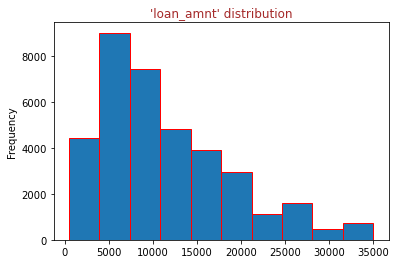

In [60]:
data.loan_amnt.plot.hist(edgecolor= 'red')
plt.title('\'loan_amnt\' distribution', fontdict={'fontsize':12, 'fontweight':6, 'color':'brown'})
plt.show()

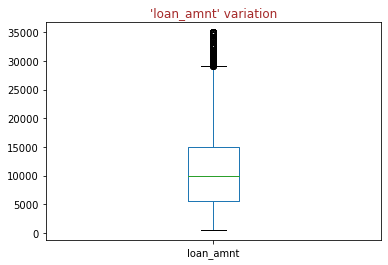

In [61]:
data.loan_amnt.plot.box()
plt.title('\'loan_amnt\' variation', fontdict={'fontsize':12, 'fontweight':6, 'color':'brown'})
plt.show()

In [10]:
data.loan_amnt.describe()

count    36433.000000
mean     11307.679851
std       7433.859357
min        500.000000
25%       5600.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

#### funded_amnt

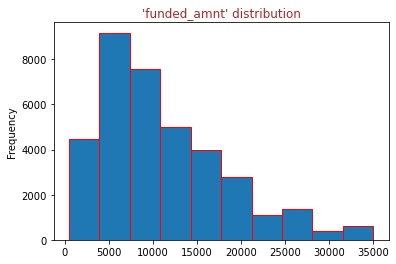

In [62]:
data.funded_amnt.plot.hist(edgecolor='red')
plt.title('\'funded_amnt\' distribution', fontdict={'fontsize':12, 'fontweight':6, 'color':'brown'})
plt.show()

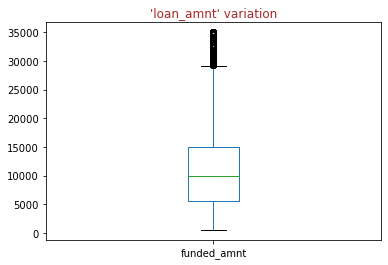

In [63]:
data.funded_amnt.plot.box()
plt.title('\'loan_amnt\' variation', fontdict={'fontsize':12, 'fontweight':6, 'color':'brown'})
plt.show()

In [11]:
data.funded_amnt.describe()

count    36433.000000
mean     11032.834244
std       7166.484281
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

#### funded_amnt_inv

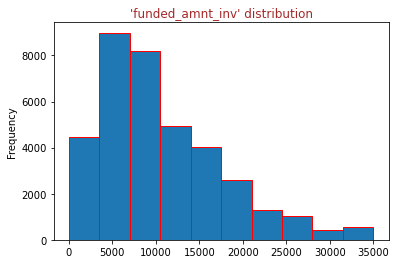

In [64]:
data.funded_amnt_inv.plot.hist(edgecolor='red')
plt.title('\'funded_amnt_inv\' distribution', fontdict={'fontsize':12, 'fontweight':6, 'color':'brown'})
plt.show()

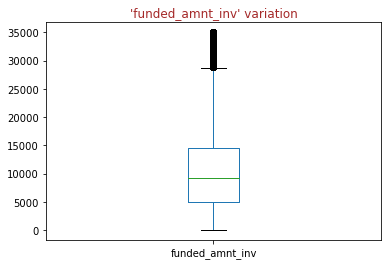

In [65]:
data.funded_amnt_inv.plot.box()
plt.title('\'funded_amnt_inv\' variation', fontdict={'fontsize':12, 'fontweight':6, 'color':'brown'})
plt.show()

In [12]:
data.funded_amnt_inv.describe()

count    36433.000000
mean     10601.325781
std       7072.842604
min          0.000000
25%       5000.000000
50%       9202.846434
75%      14508.454150
max      35000.000000
Name: funded_amnt_inv, dtype: float64

The histogram plots for 'loan_amnt', 'funded_amnt' and 'funded_amnt_inv' are almost similar which signifies that most of the times, the loan amount is funded by the bank using investor's money.

In [23]:
data.term.describe()

count          36433
unique             2
top        36 months
freq           26377
Name: term, dtype: object

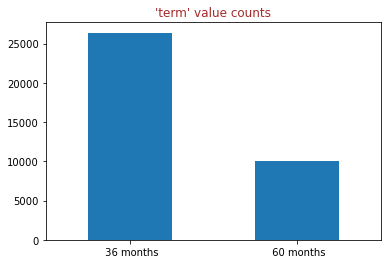

In [66]:
data.term.value_counts().plot.bar()
plt.title('\'term\' value counts', fontdict={'fontsize':12, 'fontweight':6, 'color':'brown'})
plt.xticks(rotation=0)
plt.show()

In [26]:
data.int_rate_percent.describe()

count    36433.000000
mean        12.073862
std          3.734758
min          5.420000
25%          9.320000
50%         11.860000
75%         14.650000
max         24.400000
Name: int_rate_percent, dtype: float64

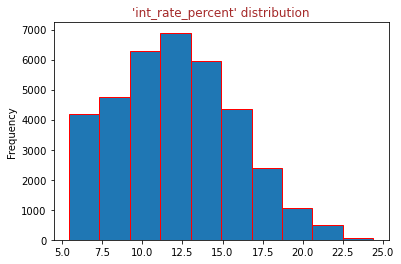

In [67]:
data.int_rate_percent.plot.hist(edgecolor='red')
plt.title('\'int_rate_percent\' distribution', fontdict={'fontsize':12, 'fontweight':6, 'color':'brown'})
plt.show()

##### Average interest rate is well under 20% which is normal

In [32]:
data.installment.describe()

count    36433.000000
mean       326.186394
std        207.389943
min         16.080000
25%        168.900000
50%        283.280000
75%        432.220000
max       1305.190000
Name: installment, dtype: float64

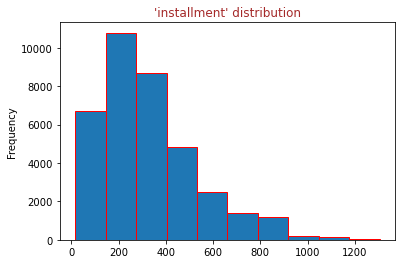

In [68]:
data.installment.plot.hist(edgecolor='red')
plt.title('\'installment\' distribution', fontdict={'fontsize':12, 'fontweight':6, 'color':'brown'})
plt.show()

The average installment is much higher as compared to median which can be attributed to the presence of outliers. In general people are more likely to default if their interest rate is high or their installment is high.

In [33]:
data.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate_percent,installment,grade,sub_grade,emp_length,home_ownership,annual_inc_categorical,verification_status,issue_d_month,issue_d_year,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line_month,earliest_cr_line_year,inq_last_6mths,open_acc,pub_rec,revol_bal_categorical,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d_month,last_pymnt_d_year,last_pymnt_amnt,last_credit_pull_d_month,last_credit_pull_d_year,pub_rec_bankruptcies
0,2500,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,52000,Source Verified,12,2011,Charged Off,car,309,GA,1.0,0,4,1999,5,3,0,10000,9.4,4,0.0,0.0,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,4,2013,119.66,9,2013,0.0
1,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,52000,Source Verified,12,2011,Fully Paid,other,917,CA,20.0,0,2,1996,1,10,0,10000,21.0,37,0.0,0.0,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,1,2015,357.48,4,2016,0.0


In [34]:
data.grade.describe()

count     36433
unique        7
top           B
freq      11035
Name: grade, dtype: object

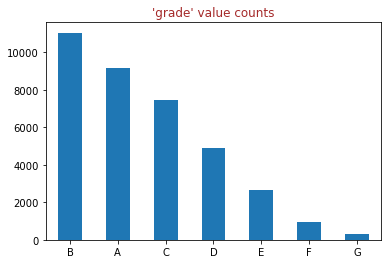

In [69]:
data.grade.value_counts().plot.bar()
plt.title('\'grade\' value counts', fontdict={'fontsize':12, 'fontweight':6, 'color':'brown'})
plt.xticks(rotation=0)
plt.show()

Above bar chart shows that except grade 'B', the frequency for each grade reduces

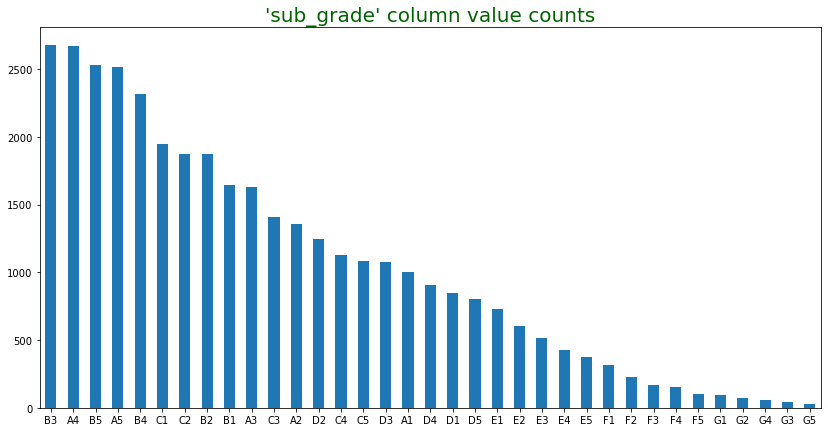

In [58]:
plt.figure(figsize=[14, 7])
data.sub_grade.value_counts().plot.bar()
plt.title('\'sub_grade\' column value counts', fontdict={'fontsize':20, 'fontweight':8, 'color':'darkgreen'})
plt.xticks(rotation=0)
plt.show()

In [50]:
data.emp_length.describe()

count    36433.000000
mean         5.015645
std          3.542914
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

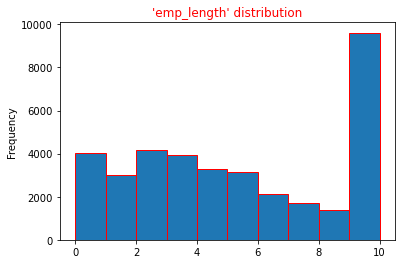

In [55]:
data.emp_length.plot.hist(edgecolor='red')
plt.title('\'emp_length\' distribution', fontdict={'fontsize':12, 'fontweight':5, 'color':'red'})
plt.show()

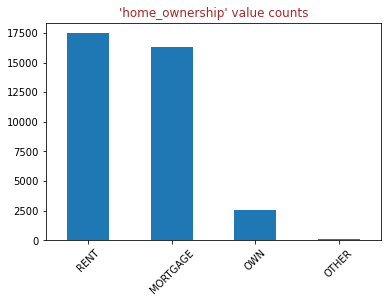

In [73]:
data.home_ownership.value_counts().plot.bar()
plt.title('\'home_ownership\' value counts', fontdict={'fontsize':12, 'fontweight':6, 'color':'brown'})
plt.xticks(rotation=45)
plt.show()

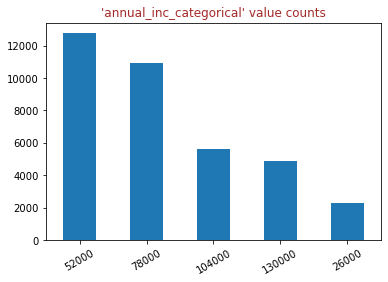

In [75]:
data.annual_inc_categorical.value_counts().plot.bar()
plt.title('\'annual_inc_categorical\' value counts', fontdict={'fontsize':12, 'fontweight':6, 'color':'brown'})
plt.xticks(rotation=30)
plt.show()

###### In the data cleaning part, we created a derived metric 'annual_inc_categorical' from 'annual_inc' column because of the observation that the outliers are legitimate values so they need to be included in the data for analysis. We made 5 bins and then clubbed all the outlier values in the last bin. The result is what we can see above.

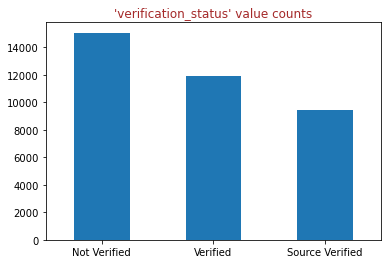

In [79]:
data.verification_status.value_counts().plot.bar()
plt.title('\'verification_status\' value counts', fontdict={'fontsize':12, 'fontweight':6, 'color':'brown'})
plt.xticks(rotation=0)
plt.show()

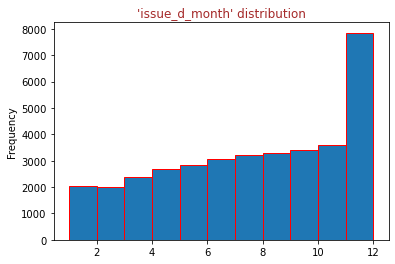

In [87]:
data.issue_d_month.plot.hist(edgecolor='red', bins=range(1, 13))
plt.title('\'issue_d_month\' distribution', fontdict={'fontsize':12, 'fontweight':6, 'color':'brown'})
plt.show()

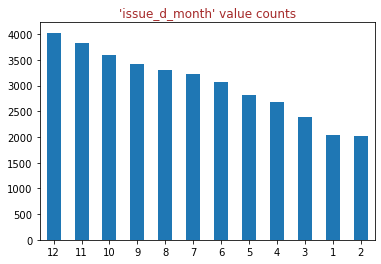

In [90]:
data.issue_d_month.value_counts().plot.bar()
plt.title('\'issue_d_month\' value counts', fontdict={'fontsize':12, 'fontweight':6, 'color':'brown'})
plt.xticks(rotation=0)
plt.show()

A clear observation drawn from the above graph is that more loans are approved with each passing month, starting from january. In other words, maximum loans are approved in december and minimum loans are approved in jan and feb

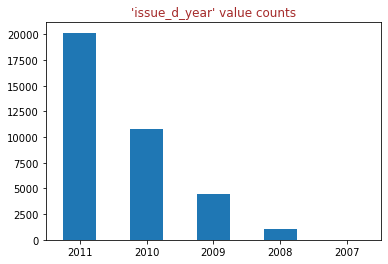

In [91]:
data.issue_d_year.value_counts().plot.bar()
plt.title('\'issue_d_year\' value counts', fontdict={'fontsize':12, 'fontweight':6, 'color':'brown'})
plt.xticks(rotation=0)
plt.show()

The obervation can be seen with issue_d_years column, which is also a derived column. This can be attributed to:-
- The company selling more loans with each passing year is a symbol of growth of the company along these years

But how does one explain the growth with each passing month ? Why does so many loans are sold in december and much less loans in january which is the next month only ?

In [108]:
data.loan_status.describe()

count          36433
unique             3
top       Fully Paid
freq           30424
Name: loan_status, dtype: object

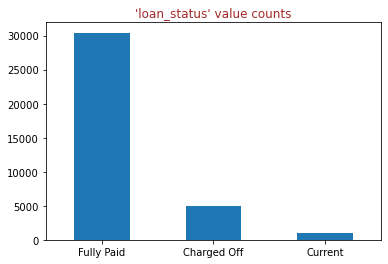

In [111]:
data.loan_status.value_counts().plot.bar()
plt.title('\'loan_status\' value counts', fontdict={'fontsize':12, 'fontweight':6, 'color':'brown'})
plt.xticks(rotation=0)
plt.show()

##### Few loans are charged off/default in the dataset

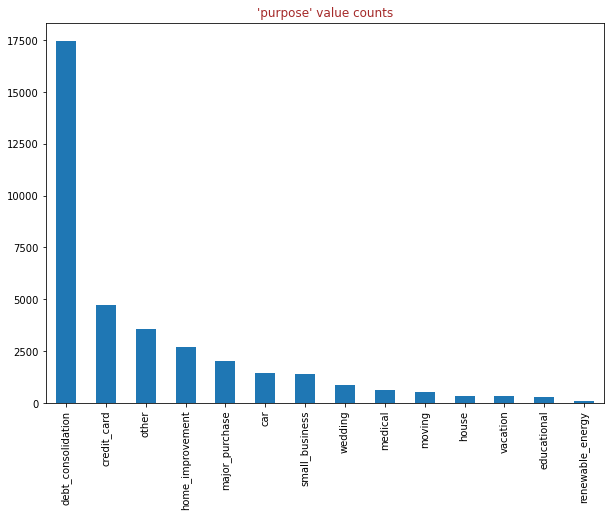

In [93]:
plt.figure(figsize=[10, 7])
data.purpose.value_counts().plot.bar()
plt.title('\'purpose\' value counts', fontdict={'fontsize':12, 'fontweight':6, 'color':'brown'})
# plt.xticks(rotation=0)
plt.show()

###### Most loans were bought for the purpose of debt consolidation and the second is credit card which is another kind of debt

In [94]:
data.head(1)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate_percent,installment,grade,sub_grade,emp_length,home_ownership,annual_inc_categorical,verification_status,issue_d_month,issue_d_year,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line_month,earliest_cr_line_year,inq_last_6mths,open_acc,pub_rec,revol_bal_categorical,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d_month,last_pymnt_d_year,last_pymnt_amnt,last_credit_pull_d_month,last_credit_pull_d_year,pub_rec_bankruptcies
0,2500,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,52000,Source Verified,12,2011,Charged Off,car,309,GA,1.0,0,4,1999,5,3,0,10000,9.4,4,0.0,0.0,1008.71,1008.71,456.46,435.17,0.0,117.08,1.11,4,2013,119.66,9,2013,0.0


In [95]:
data.zip_code.describe()

count    36433.000000
mean       501.402053
std        329.645487
min          7.000000
25%        200.000000
50%        446.000000
75%        852.000000
max        999.000000
Name: zip_code, dtype: float64

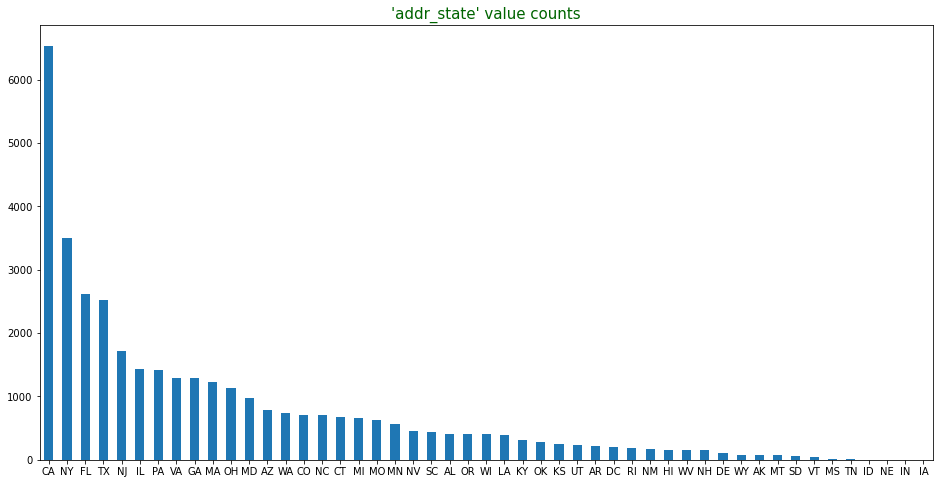

In [100]:
plt.figure(figsize=[16, 8])
data.addr_state.value_counts().plot.bar()
plt.title('\'addr_state\' value counts', fontdict={'fontsize':15, 'fontweight':8, 'color':'darkgreen'})
plt.xticks(rotation=0)
plt.show()

Most loans were sold to Californians, followed by New Yorkers

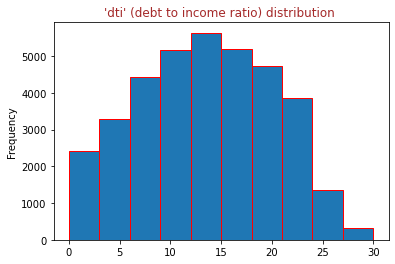

In [106]:
data.dti.plot.hist(edgecolor='red')
plt.title('\'dti\' (debt to income ratio) distribution ', fontdict={'fontsize':12, 'fontweight':6, 'color':'brown'})
plt.show()

- Debt to income ratio tells us about how much the person has to pay as debts and how much he earns in one month
- Higher the dti, more the chances of default by the person
- The distribution is normal i.e. few people have high and low dti

In [107]:
data.head(1)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate_percent,installment,grade,sub_grade,emp_length,home_ownership,annual_inc_categorical,verification_status,issue_d_month,issue_d_year,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line_month,earliest_cr_line_year,inq_last_6mths,open_acc,pub_rec,revol_bal_categorical,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d_month,last_pymnt_d_year,last_pymnt_amnt,last_credit_pull_d_month,last_credit_pull_d_year,pub_rec_bankruptcies
0,2500,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,52000,Source Verified,12,2011,Charged Off,car,309,GA,1.0,0,4,1999,5,3,0,10000,9.4,4,0.0,0.0,1008.71,1008.71,456.46,435.17,0.0,117.08,1.11,4,2013,119.66,9,2013,0.0


In [5]:
data.delinq_2yrs.describe()

count    36433.000000
mean         0.146131
std          0.492199
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: delinq_2yrs, dtype: float64

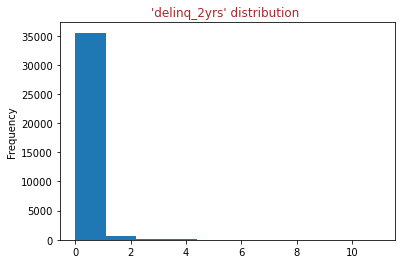

In [7]:
data.delinq_2yrs.plot.hist()
plt.title('\'delinq_2yrs\' distribution ', fontdict={'fontsize':12, 'fontweight':6, 'color':'brown'})
plt.show()

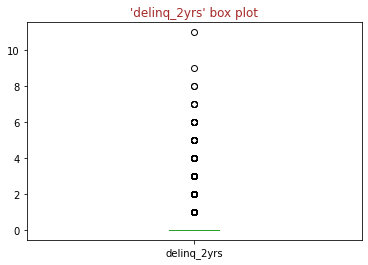

In [10]:
data.delinq_2yrs.plot.box()
plt.title('\'delinq_2yrs\' box plot', fontdict={'fontsize':12, 'fontweight':6, 'color':'brown'})
plt.show()

In [11]:
data.delinq_2yrs.value_counts()

0     32486
1      3028
2       628
3       197
4        55
5        21
6        10
7         4
8         2
9         1
11        1
Name: delinq_2yrs, dtype: int64

'delinq_2yrs' stands for the number of 30+ days past due incidents of delinquency in the borrower's credit line for the past 2 yrs. In the box plot, all the numbers except 0 are considered outliers but we cannot just remove these values as these values are the only information that the column has and by its meaning, it seems important for the analysis of defaulters.

In [12]:
data.earliest_cr_line_month.describe()

count    36433.000000
mean         6.897318
std          3.542471
min          1.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         12.000000
Name: earliest_cr_line_month, dtype: float64

In [13]:
data.earliest_cr_line_month.value_counts()

10    3765
12    3731
11    3629
9     3272
1     3177
8     3047
7     2820
6     2678
5     2646
2     2617
3     2528
4     2523
Name: earliest_cr_line_month, dtype: int64

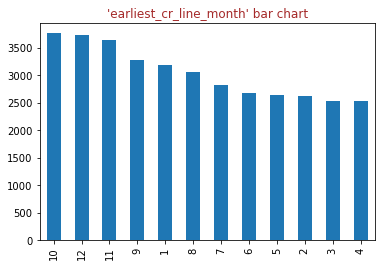

In [14]:
data.earliest_cr_line_month.value_counts().plot.bar()
plt.title('\'earliest_cr_line_month\' bar chart', fontdict={'fontsize':12, 'fontweight':6, 'color':'brown'})
plt.show()

In [15]:
data.earliest_cr_line_year.value_counts()

2000    3034
1999    2763
1998    2645
2001    2363
1997    2271
1996    2074
1995    1974
1994    1860
2002    1794
2003    1740
2004    1639
2005    1406
1993    1398
2006    1079
1992     970
1990     944
1991     884
1989     781
1988     671
2007     668
1987     565
1986     447
1985     406
1984     360
1983     296
1982     196
1981     154
1980     150
2008     144
1979     141
1978     130
1977      90
1976      73
1975      57
1974      51
1973      41
1970      35
1971      34
1972      33
1969      22
2068      12
2067      12
2066       7
2065       6
2063       4
2062       3
2064       2
2056       1
2054       1
2050       1
2046       1
Name: earliest_cr_line_year, dtype: int64

'earliest_cr_line' column stands for the month the borrower's earliest reported credit line was opened. According to the given description, it cannot be a month of the future so clearly the column has some invalid values and we need to get rid of them.

In [5]:
data = data[~(data.earliest_cr_line_year > 2021)]

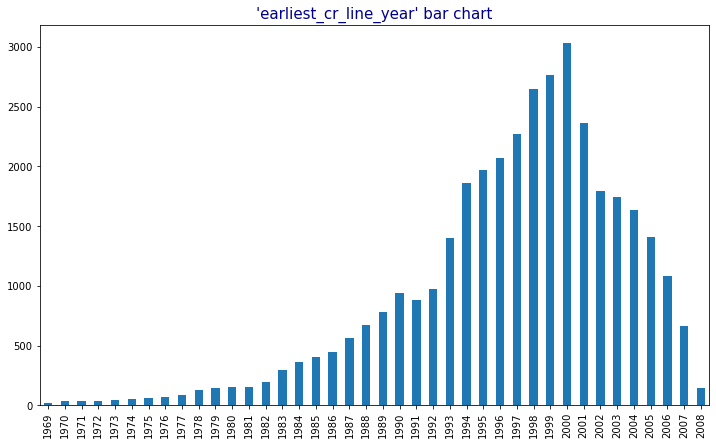

In [22]:
plt.figure(figsize=[12, 7])
data.earliest_cr_line_year.value_counts().sort_index().plot.bar()
plt.title('\'earliest_cr_line_year\' bar chart', fontdict={'fontsize':15, 'fontweight':8, 'color':'darkblue'})
plt.show()

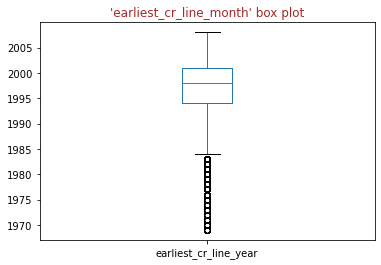

In [23]:
data.earliest_cr_line_year.plot.box()
plt.title('\'earliest_cr_line_month\' box plot', fontdict={'fontsize':12, 'fontweight':6, 'color':'brown'})
plt.show()

These box plots suggest that few applicants have first line of credit well before 1985 as well and other 99 percent applicants have first line of credit after that.

In [26]:
data.head(1)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate_percent,installment,grade,sub_grade,emp_length,home_ownership,annual_inc_categorical,verification_status,issue_d_month,issue_d_year,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line_month,earliest_cr_line_year,inq_last_6mths,open_acc,pub_rec,revol_bal_categorical,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d_month,last_pymnt_d_year,last_pymnt_amnt,last_credit_pull_d_month,last_credit_pull_d_year,pub_rec_bankruptcies
0,2500,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,52000,Source Verified,12,2011,Charged Off,car,309,GA,1.0,0,4,1999,5,3,0,10000,9.4,4,0.0,0.0,1008.71,1008.71,456.46,435.17,0.0,117.08,1.11,4,2013,119.66,9,2013,0.0


'inq_last_6mths' stands for the number of enquiries made by the applicant in last 6 months

In [27]:
data.inq_last_6mths.describe()

count    36383.000000
mean         0.865349
std          1.063605
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: inq_last_6mths, dtype: float64

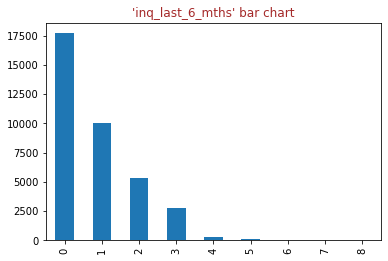

In [29]:
data.inq_last_6mths.value_counts().plot.bar()
plt.title('\'inq_last_6_mths\' bar chart', fontdict={'fontsize':12, 'fontweight':6, 'color':'brown'})
plt.show()

In [30]:
data.open_acc.describe()

count    36383.000000
mean         9.349669
std          4.373383
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64

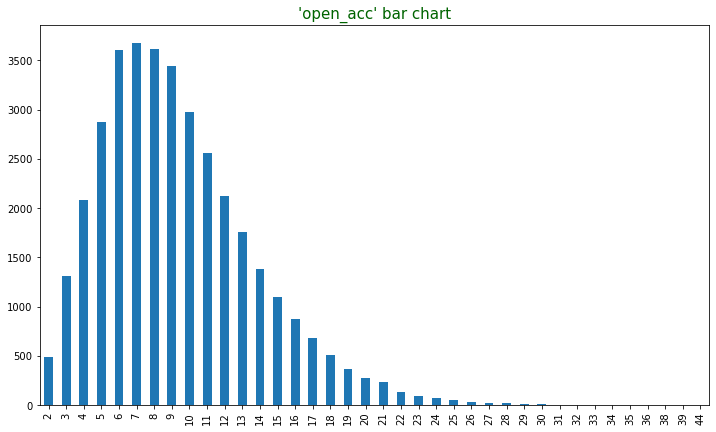

In [34]:
plt.figure(figsize=[12, 7])
data.open_acc.value_counts().sort_index().plot.bar()
plt.title('\'open_acc\' bar chart', fontdict={'fontsize':15, 'fontweight':6, 'color':'darkgreen'})
plt.show()

'open_acc' stands for the number of open credit lines in the borrower's credit file

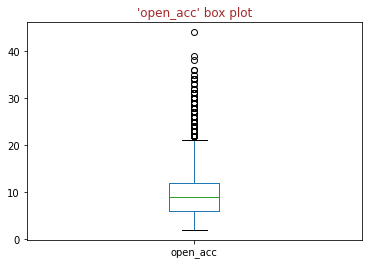

In [35]:
data.open_acc.plot.box()
plt.title('\'open_acc\' box plot', fontdict={'fontsize':12, 'fontweight':6, 'color':'brown'})
plt.show()

The above plot suggests that having <= 20 open credit lines is common and above 20 is needed to be investigated

In [36]:
data.pub_rec.describe()

count    36383.000000
mean         0.053541
std          0.234561
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: pub_rec, dtype: float64

In [37]:
data.pub_rec.value_counts()

0    34501
1     1827
2       46
3        7
4        2
Name: pub_rec, dtype: int64

'pub_rec' stands for the number of derogatory public records

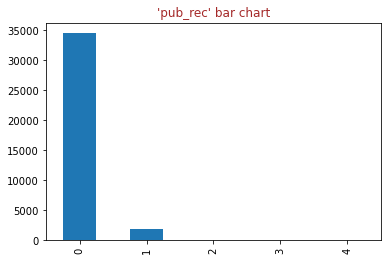

In [43]:
data.pub_rec.value_counts().plot.bar()
plt.title('\'pub_rec\' bar chart', fontdict={'fontsize':12, 'fontweight':6, 'color':'brown'})
plt.show()

In [39]:
data.head(1)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate_percent,installment,grade,sub_grade,emp_length,home_ownership,annual_inc_categorical,verification_status,issue_d_month,issue_d_year,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line_month,earliest_cr_line_year,inq_last_6mths,open_acc,pub_rec,revol_bal_categorical,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d_month,last_pymnt_d_year,last_pymnt_amnt,last_credit_pull_d_month,last_credit_pull_d_year,pub_rec_bankruptcies
0,2500,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,52000,Source Verified,12,2011,Charged Off,car,309,GA,1.0,0,4,1999,5,3,0,10000,9.4,4,0.0,0.0,1008.71,1008.71,456.46,435.17,0.0,117.08,1.11,4,2013,119.66,9,2013,0.0


In [40]:
data.revol_bal_categorical.describe()

count    36383.000000
mean     16592.914273
std       7880.940319
min      10000.000000
25%      10000.000000
50%      10000.000000
75%      20000.000000
max      30000.000000
Name: revol_bal_categorical, dtype: float64

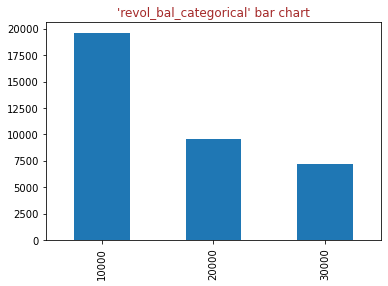

In [45]:
data.revol_bal_categorical.value_counts().plot.bar()
plt.title('\'revol_bal_categorical\' bar chart', fontdict={'fontsize':12, 'fontweight':6, 'color':'brown'})
plt.show()

In [46]:
data.revol_util.describe()

count    36383.000000
mean        49.275154
std         28.191443
min          0.000000
25%         26.100000
50%         49.800000
75%         72.700000
max         99.900000
Name: revol_util, dtype: float64

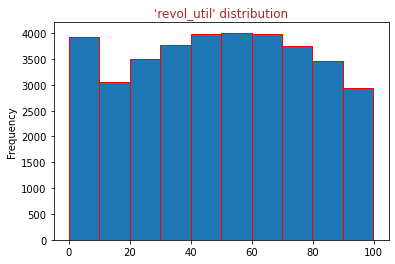

In [48]:
data.revol_util.plot.hist(edgecolor='red')
plt.title('\'revol_util\' distribution', fontdict={'fontsize':12, 'fontweight':6, 'color':'brown'})
plt.show()

'revol_util' stands for the amount of credit the borrower is using relative to all available revolving credit

In [50]:
data.total_acc.describe()

count    36383.000000
mean        22.240414
std         11.376073
min          2.000000
25%         14.000000
50%         21.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64

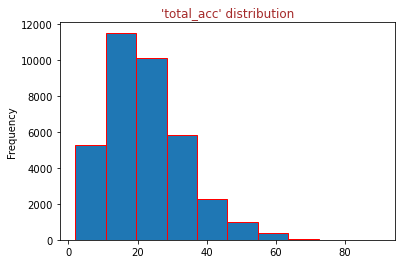

In [52]:
data.total_acc.plot.hist(edgecolor='red')
plt.title('\'total_acc\' distribution', fontdict={'fontsize':12, 'fontweight':6, 'color':'brown'})
plt.show()

'total_acc' stands for the total number of credit lines in the borrower's credit line

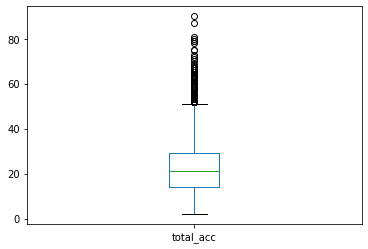

In [53]:
data.total_acc.plot.box()
plt.show()

For the ease of analysis, I will put 'open_acc' and 'total_acc' side by side in dataframe

In [6]:
data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate_percent', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc_categorical', 'verification_status',
       'issue_d_month', 'issue_d_year', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line_month',
       'earliest_cr_line_year', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal_categorical', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d_month', 'last_pymnt_d_year',
       'last_pymnt_amnt', 'last_credit_pull_d_month',
       'last_credit_pull_d_year', 'pub_rec_bankruptcies'],
      dtype='object')

In [7]:
data = data[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate_percent', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc_categorical', 'verification_status',
       'issue_d_month', 'issue_d_year', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line_month',
       'earliest_cr_line_year', 'inq_last_6mths', 'open_acc', 'total_acc', 'pub_rec',
       'revol_bal_categorical', 'revol_util', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d_month', 'last_pymnt_d_year',
       'last_pymnt_amnt', 'last_credit_pull_d_month',
       'last_credit_pull_d_year', 'pub_rec_bankruptcies']]

In [57]:
data.head(1)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate_percent,installment,grade,sub_grade,emp_length,home_ownership,annual_inc_categorical,verification_status,issue_d_month,issue_d_year,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line_month,earliest_cr_line_year,inq_last_6mths,open_acc,total_acc,pub_rec,revol_bal_categorical,revol_util,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d_month,last_pymnt_d_year,last_pymnt_amnt,last_credit_pull_d_month,last_credit_pull_d_year,pub_rec_bankruptcies
0,2500,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,52000,Source Verified,12,2011,Charged Off,car,309,GA,1.0,0,4,1999,5,3,4,0,10000,9.4,0.0,0.0,1008.71,1008.71,456.46,435.17,0.0,117.08,1.11,4,2013,119.66,9,2013,0.0


In [11]:
data.out_prncp.describe()

count    36383.000000
mean        52.514975
std        380.085018
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       6311.470000
Name: out_prncp, dtype: float64

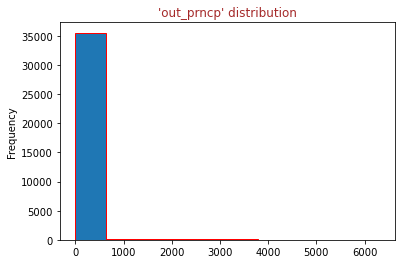

In [60]:
data.out_prncp.plot.hist(edgecolor='red')
plt.title('\'out_prncp\' distribution', fontdict={'fontsize':12, 'fontweight':6, 'color':'brown'})
plt.show()

In [61]:
data.out_prncp_inv.describe()

count    36383.000000
mean        52.262249
std        378.676966
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       6307.370000
Name: out_prncp_inv, dtype: float64

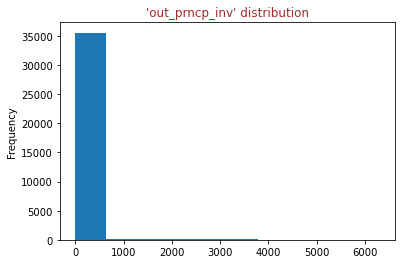

In [62]:
data.out_prncp_inv.plot.hist()
plt.title('\'out_prncp_inv\' distribution', fontdict={'fontsize':12, 'fontweight':6, 'color':'brown'})
plt.show()

In [12]:
data[data.out_prncp != data.out_prncp_inv]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate_percent,installment,grade,sub_grade,emp_length,home_ownership,annual_inc_categorical,verification_status,issue_d_month,issue_d_year,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line_month,earliest_cr_line_year,inq_last_6mths,open_acc,total_acc,pub_rec,revol_bal_categorical,revol_util,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d_month,last_pymnt_d_year,last_pymnt_amnt,last_credit_pull_d_month,last_credit_pull_d_year,pub_rec_bankruptcies
27,10000,10000,9975.00000,60 months,15.96,242.97,C,C5,2,RENT,52000,Verified,12,2011,Current,debt_consolidation,330,FL,22.83,0,2,1997,1,11,31,0,20000,63.6,1849.10,1844.43,12594.24,12562.85,8150.89,4443.35,0.0,0.0,0.0,5,2016,242.97,4,2016,0.0
34,12500,12500,12475.00000,60 months,12.69,282.44,B,B5,1,RENT,52000,Verified,12,2011,Current,debt_consolidation,604,IL,16.04,0,12,2001,3,6,24,0,20000,50.0,2181.42,2177.03,14636.30,14607.08,10318.58,4317.72,0.0,0.0,0.0,5,2016,282.44,5,2016,0.0
79,14000,14000,13975.00000,60 months,17.27,349.98,D,D3,4,RENT,52000,Verified,12,2011,Current,other,992,WA,6.34,0,7,2005,2,5,10,0,10000,79.4,2637.34,2632.59,18176.96,18144.59,11362.67,6814.29,0.0,0.0,0.0,5,2016,349.98,5,2016,0.0
88,15300,15300,15275.00000,60 months,22.06,423.10,F,F4,6,RENT,104000,Verified,12,2011,Current,credit_card,226,VA,20.58,0,2,1984,2,14,27,0,30000,89.7,3125.79,3120.68,21988.20,21952.28,12174.21,9813.99,0.0,0.0,0.0,5,2016,423.10,5,2016,0.0
175,11000,11000,10750.00000,60 months,13.49,253.06,C,C1,10,MORTGAGE,130000,Verified,12,2011,Current,debt_consolidation,927,CA,10.94,0,11,1997,0,10,31,0,10000,24.1,1941.27,1897.50,13131.62,12832.58,9058.73,4072.89,0.0,0.0,0.0,5,2016,253.06,5,2016,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14459,10750,10750,10725.00000,60 months,14.79,254.56,C,C4,1,MORTGAGE,52000,Verified,5,2011,Current,debt_consolidation,231,VA,23.84,0,2,1993,1,12,28,0,30000,53.9,264.79,264.16,14999.29,14964.42,10485.21,4514.08,0.0,0.0,0.0,5,2016,254.56,5,2016,0.0
14528,13000,13000,12750.00000,60 months,10.00,276.22,B,B2,10,MORTGAGE,52000,Verified,5,2011,Current,debt_consolidation,152,PA,18.38,0,5,1996,0,9,22,0,10000,20.5,283.94,278.64,16281.62,15968.28,12716.06,3565.56,0.0,0.0,0.0,5,2016,276.22,5,2016,0.0
14621,16000,16000,15750.00000,60 months,10.99,347.80,B,B3,3,MORTGAGE,78000,Verified,5,2011,Current,debt_consolidation,152,PA,20.38,0,9,1996,0,10,43,0,10000,20.5,71.83,71.05,20825.85,20499.94,15928.17,4897.68,0.0,0.0,0.0,5,2016,347.80,5,2016,0.0
14802,21000,21000,20700.00000,60 months,18.79,542.33,E,E3,0,MORTGAGE,104000,Verified,5,2011,Current,debt_consolidation,335,FL,20.31,0,5,1998,0,14,22,0,30000,94.5,61.52,61.05,32478.33,32013.54,20938.48,11539.85,0.0,0.0,0.0,5,2016,542.33,5,2016,0.0


In [67]:
data[data.out_prncp > 0].shape

(1065, 43)

In [68]:
data[data.out_prncp_inv > 0].shape

(1065, 43)

In [8]:
d = data[data.out_prncp != data.out_prncp_inv]
(d.out_prncp - d.out_prncp_inv).describe()

count     531.000000
mean       17.316234
std        58.643806
min         0.030000
25%         2.845000
50%         5.280000
75%        21.820000
max      1052.900000
dtype: float64

- there are only 1065 values in 'out_prncp' and 'out_prncp_inv' which are non zero
- half of the non zero values of two columns are same
- the avg. difference in the differing values is about 17 dollars and median difference is 5 dollars

**Using the given facts, we can assume that the column 'out_prncp_inv' is redundant for this analysis**

In [9]:
data.drop(columns='out_prncp_inv', inplace=True)

In [77]:
data.head(1)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate_percent,installment,grade,sub_grade,emp_length,home_ownership,annual_inc_categorical,verification_status,issue_d_month,issue_d_year,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line_month,earliest_cr_line_year,inq_last_6mths,open_acc,total_acc,pub_rec,revol_bal_categorical,revol_util,out_prncp,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d_month,last_pymnt_d_year,last_pymnt_amnt,last_credit_pull_d_month,last_credit_pull_d_year,pub_rec_bankruptcies
0,2500,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,52000,Source Verified,12,2011,Charged Off,car,309,GA,1.0,0,4,1999,5,3,4,0,10000,9.4,0.0,1008.71,1008.71,456.46,435.17,0.0,117.08,1.11,4,2013,119.66,9,2013,0.0


In [78]:
data.total_pymnt.describe()

count    36383.00000
mean     12307.54137
std       9044.73785
min         33.73000
25%       5670.17000
50%      10096.52630
75%      16693.17723
max      58563.67993
Name: total_pymnt, dtype: float64

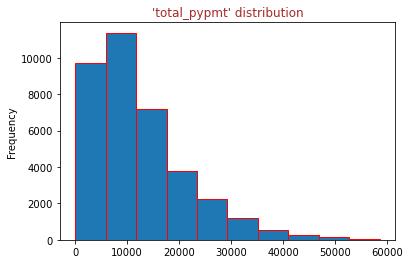

In [79]:
data.total_pymnt.plot.hist(edgecolor='red')
plt.title('\'total_pypmt\' distribution', fontdict={'fontsize':12, 'fontweight':6, 'color':'brown'})
plt.show()

In [80]:
data.total_pymnt_inv.describe()

count    36383.000000
mean     11837.460365
std       8907.954256
min          0.000000
25%       5412.315000
50%       9626.330000
75%      16084.030000
max      58563.680000
Name: total_pymnt_inv, dtype: float64

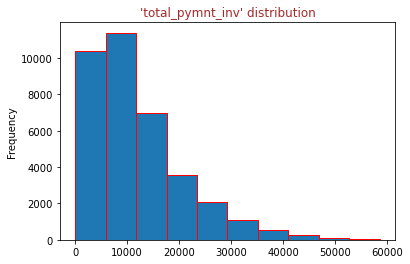

In [82]:
data.total_pymnt_inv.plot.hist(edgecolor='red')
plt.title('\'total_pymnt_inv\' distribution', fontdict={'fontsize':12, 'fontweight':6, 'color':'brown'})
plt.show()

I think the column 'total_pymnt_inv' is not useful for this analysis because the payment is first given to the bank then it is given to the investor by the bank itself so it does not tell us anything about the customer behaviour. This column describes the behavious of bank rather than the customer.

In [10]:
data.drop(columns='total_pymnt_inv', inplace= True)

In [16]:
data.head(1)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate_percent,installment,grade,sub_grade,emp_length,home_ownership,annual_inc_categorical,verification_status,issue_d_month,issue_d_year,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line_month,earliest_cr_line_year,inq_last_6mths,open_acc,total_acc,pub_rec,revol_bal_categorical,revol_util,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d_month,last_pymnt_d_year,last_pymnt_amnt,last_credit_pull_d_month,last_credit_pull_d_year,pub_rec_bankruptcies
0,2500,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,52000,Source Verified,12,2011,Charged Off,car,309,GA,1.0,0,4,1999,5,3,4,0,10000,9.4,0.0,1008.71,456.46,435.17,0.0,117.08,1.11,4,2013,119.66,9,2013,0.0


In [17]:
data.total_rec_prncp.describe()

count    36383.000000
mean      9910.788073
std       7051.349616
min          0.000000
25%       4800.000000
50%       8122.880000
75%      14000.000000
max      35000.020000
Name: total_rec_prncp, dtype: float64

In [18]:
data.total_rec_prncp.value_counts()

10000.00    2130
12000.00    1709
5000.00     1542
6000.00     1519
15000.00    1296
            ... 
1164.83        1
4349.47        1
563.90         1
23250.00       1
10917.87       1
Name: total_rec_prncp, Length: 7243, dtype: int64

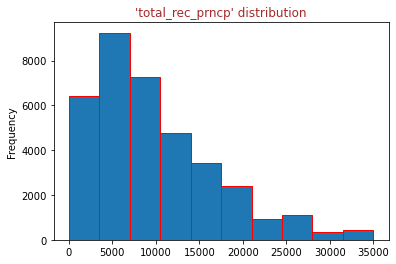

In [19]:
data.total_rec_prncp.plot.hist(edgecolor='red')
plt.title('\'total_rec_prncp\' distribution', fontdict={'fontsize':12, 'fontweight':6, 'color':'brown'})
plt.show()

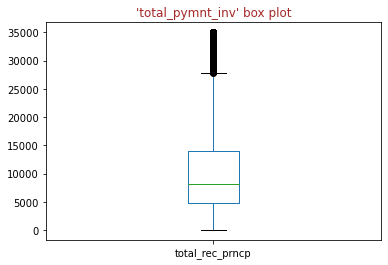

In [20]:
data.total_rec_prncp.plot.box()
plt.title('\'total_pymnt_inv\' box plot', fontdict={'fontsize':12, 'fontweight':6, 'color':'brown'})
plt.show()

In [21]:
data.total_rec_int.describe()

count    36383.000000
mean      2303.364271
std       2627.861339
min          6.220000
25%        677.940000
50%       1379.810000
75%       2889.695000
max      23563.680000
Name: total_rec_int, dtype: float64

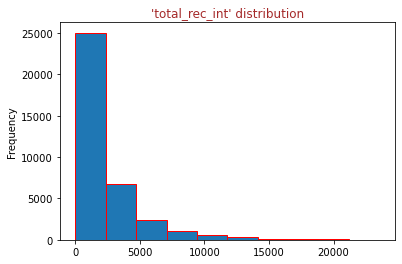

In [23]:
data.total_rec_int.plot.hist(edgecolor='red')
plt.title('\'total_rec_int\' distribution', fontdict={'fontsize':12, 'fontweight':6, 'color':'brown'})
plt.show()

In [25]:
data.recoveries.describe()

count    36383.000000
mean        92.088715
std        678.303987
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      29623.350000
Name: recoveries, dtype: float64

In [27]:
data[data.loan_status == 'Fully Paid'].recoveries.describe()

count    30384.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: recoveries, dtype: float64

I think that the 'recoveries' column can be dropped because it is not useful to determine the kind of defaulters.

In [11]:
data.drop(columns='recoveries', inplace=True)

In [29]:
data.head(1)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate_percent,installment,grade,sub_grade,emp_length,home_ownership,annual_inc_categorical,verification_status,issue_d_month,issue_d_year,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line_month,earliest_cr_line_year,inq_last_6mths,open_acc,total_acc,pub_rec,revol_bal_categorical,revol_util,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,collection_recovery_fee,last_pymnt_d_month,last_pymnt_d_year,last_pymnt_amnt,last_credit_pull_d_month,last_credit_pull_d_year,pub_rec_bankruptcies
0,2500,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,52000,Source Verified,12,2011,Charged Off,car,309,GA,1.0,0,4,1999,5,3,4,0,10000,9.4,0.0,1008.71,456.46,435.17,0.0,1.11,4,2013,119.66,9,2013,0.0


In [30]:
data.total_rec_late_fee.describe()

count    36383.000000
mean         1.300392
std          7.068364
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        180.200000
Name: total_rec_late_fee, dtype: float64

In [31]:
data.total_rec_late_fee.value_counts()

0.000000     34570
15.000000      224
30.000000       51
15.000000       49
15.000000       42
             ...  
37.323504        1
14.977710        1
14.896508        1
14.971231        1
14.939744        1
Name: total_rec_late_fee, Length: 1192, dtype: int64

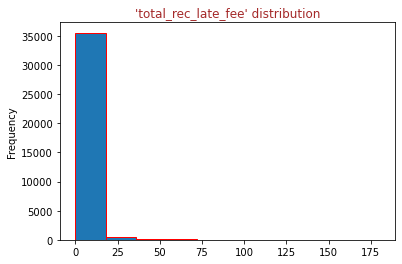

In [32]:
data.total_rec_late_fee.plot.hist(edgecolor='red')
plt.title('\'total_rec_late_fee\' distribution', fontdict={'fontsize':12, 'fontweight':6, 'color':'brown'})
plt.show()

There are some huge outlier values but I think they are important for the analysis.

In [33]:
data.collection_recovery_fee.describe()

count    36383.000000
mean        11.547038
std        140.043327
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       7002.190000
Name: collection_recovery_fee, dtype: float64

'collection_recovery_fee' can also be dropped off for the same reason as 'recoveries'

In [12]:
data.drop(columns='collection_recovery_fee', inplace=True)

In [35]:
data.last_pymnt_d_month.describe()

count    36383.000000
mean         6.453921
std          3.414829
min          1.000000
25%          4.000000
50%          6.000000
75%          9.000000
max         12.000000
Name: last_pymnt_d_month, dtype: float64

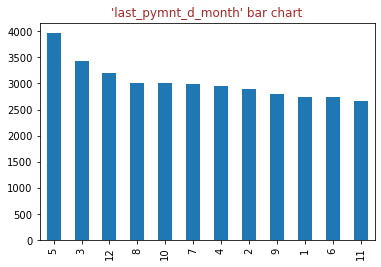

In [37]:
data.last_pymnt_d_month.value_counts().plot.bar()
plt.title('\'last_pymnt_d_month\' bar chart', fontdict={'fontsize':12, 'fontweight':6, 'color':'brown'})
plt.show()

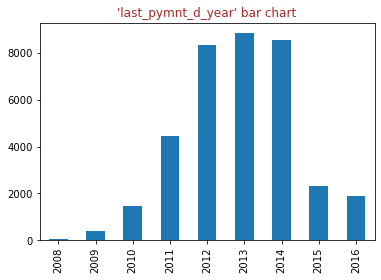

In [39]:
data.last_pymnt_d_year.value_counts().sort_index().plot.bar()
plt.title('\'last_pymnt_d_year\' bar chart', fontdict={'fontsize':12, 'fontweight':6, 'color':'brown'})
plt.show()

In [40]:
data.last_pymnt_amnt.describe()

count    36383.000000
mean      2743.163696
std       4474.425408
min          0.010000
25%        226.275000
50%        571.700000
75%       3457.620000
max      36115.200000
Name: last_pymnt_amnt, dtype: float64

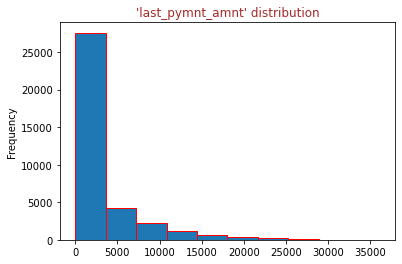

In [41]:
data.last_pymnt_amnt.plot.hist(edgecolor='red')
plt.title('\'last_pymnt_amnt\' distribution', fontdict={'fontsize':12, 'fontweight':6, 'color':'brown'})
plt.show()

In [42]:
data.head(1)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate_percent,installment,grade,sub_grade,emp_length,home_ownership,annual_inc_categorical,verification_status,issue_d_month,issue_d_year,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line_month,earliest_cr_line_year,inq_last_6mths,open_acc,total_acc,pub_rec,revol_bal_categorical,revol_util,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_d_month,last_pymnt_d_year,last_pymnt_amnt,last_credit_pull_d_month,last_credit_pull_d_year,pub_rec_bankruptcies
0,2500,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,52000,Source Verified,12,2011,Charged Off,car,309,GA,1.0,0,4,1999,5,3,4,0,10000,9.4,0.0,1008.71,456.46,435.17,0.0,4,2013,119.66,9,2013,0.0


In [43]:
data.last_credit_pull_d_month.describe()

count    36383.000000
mean         5.810598
std          3.008389
min          1.000000
25%          4.000000
50%          5.000000
75%          8.000000
max         12.000000
Name: last_credit_pull_d_month, dtype: float64

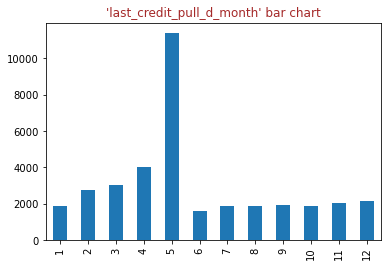

In [44]:
data.last_credit_pull_d_month.value_counts().sort_index().plot.bar()
plt.title('\'last_credit_pull_d_month\' bar chart', fontdict={'fontsize':12, 'fontweight':6, 'color':'brown'})
plt.show()

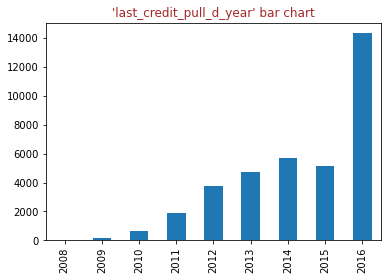

In [45]:
data.last_credit_pull_d_year.value_counts().sort_index().plot.bar()
plt.title('\'last_credit_pull_d_year\' bar chart', fontdict={'fontsize':12, 'fontweight':6, 'color':'brown'})
plt.show()

In [46]:
data.pub_rec_bankruptcies.describe()

count    36383.000000
mean         0.041283
std          0.199912
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

In [47]:
data.pub_rec_bankruptcies.value_counts()

0.0    34888
1.0     1488
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

### Step 3: Segmented Univariate Analysis

In [13]:
data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate_percent', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc_categorical', 'verification_status',
       'issue_d_month', 'issue_d_year', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line_month',
       'earliest_cr_line_year', 'inq_last_6mths', 'open_acc', 'total_acc',
       'pub_rec', 'revol_bal_categorical', 'revol_util', 'out_prncp',
       'total_pymnt', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'last_pymnt_d_month', 'last_pymnt_d_year', 'last_pymnt_amnt',
       'last_credit_pull_d_month', 'last_credit_pull_d_year',
       'pub_rec_bankruptcies'],
      dtype='object')

Useful columns are to be selected using domain knowledge and intuition

In [28]:
cols_for_seg_uni = ['loan_amnt', 'funded_amnt', 'term',
       'int_rate_percent', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc_categorical', 'verification_status',
       'issue_d_month', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line_year', 'inq_last_6mths', 'open_acc', 'total_acc',
       'pub_rec', 'revol_bal_categorical', 'revol_util',
       'pub_rec_bankruptcies', 'loan_status']

In [20]:
len(cols_for_seg_uni)

25

Before doing segmented univariate analysis, we will drop the 'Current' values of loan_status column

In [29]:
data_uni = data[~(data.loan_status == 'Current')]

In [30]:
data_uni = data_uni[cols_for_seg_uni]

Creating two dataframes for classes of target variable to do segmented univariate analysis

In [254]:
default = data_uni[data_uni.loan_status == 'Charged Off']
non_def = data_uni[data_uni.loan_status == 'Fully Paid']

'loan_amnt'

In [257]:
# making functions to plot for convenience

def box_plot(col, save = False):
    plt.figure(figsize=[10, 7])
    plt.tight_layout()
    plt.boxplot([non_def[col], default[col]])
    plt.title(f"\'{col}\' box plots", fontdict= {'fontsize':15, 'fontweight':5, 'color':'darkblue'})
    plt.ylabel(f"{col}", fontdict= {'fontsize':12, 'fontweight':5})
    plt.xticks((1, 2), ("Non Default", "Default"))
    if (save == True):
        plt.savefig(f"{col}_box_plot.png")
    plt.show()

    
def bar_chart(col, save = False):
    x = [i / non_def[col].shape[0] * 100 for i in non_def[col].value_counts().sort_index()]
    a = sorted(non_def[col].unique())
    a = [str(i) for i in a]
    y = [i / default[col].shape[0] * 100 for i in default[col].value_counts().sort_index()]
    fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True)
    ndf = ax[0].bar(a, x)
    ax[0].set_title(f"\'{col}\' Non Default", fontdict={'fontsize':12, 'fontweight':5, 'color':'darkgreen'})
    ax[0].set_ylabel("Percentage")
    df = ax[1].bar(a, y)
    ax[1].set_title(f"\'{col}\' Default", fontdict={'fontsize':12, 'fontweight':5, 'color':'darkred'})
    fig.set_size_inches(13.5, 5.5, forward= True)
    ax[0].tick_params(labelrotation=90)
    ax[1].tick_params(labelrotation=90)
    if (save == True):
        fig.savefig(f"{col}_bar_chart.png")
    plt.show()
    

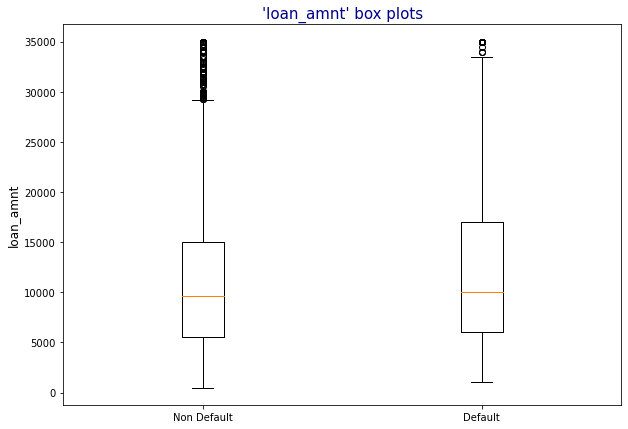

In [141]:
box_plot("loan_amnt")

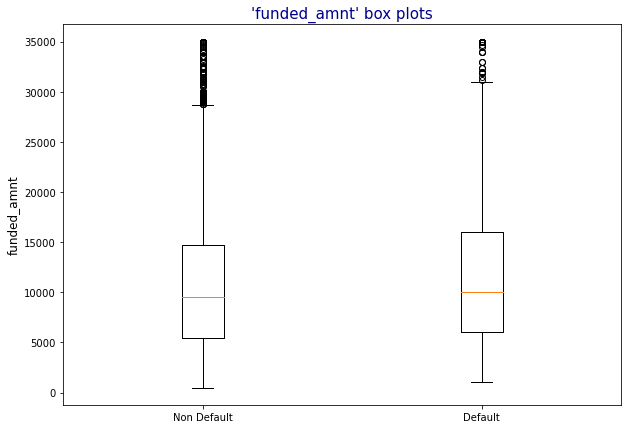

In [142]:
box_plot("funded_amnt")

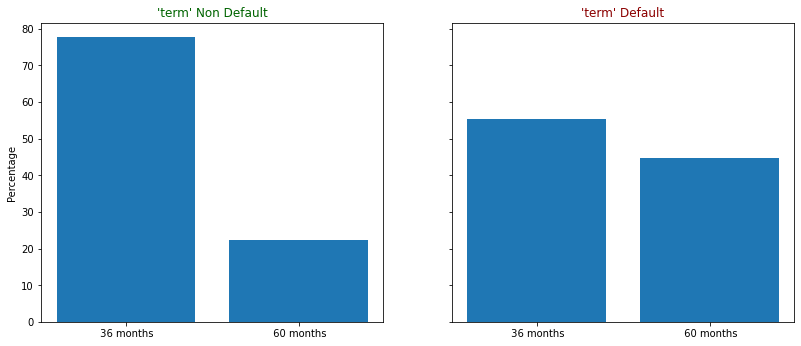

In [207]:
bar_chart("term")

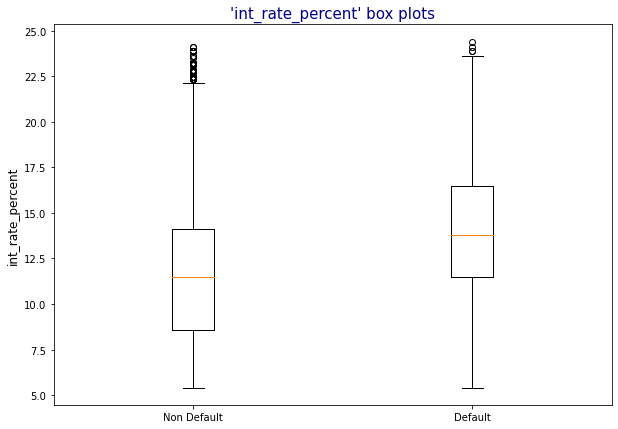

In [148]:
box_plot("int_rate_percent", save=True)

#### -- interest rate median for default is noticably higher as compared to non default.

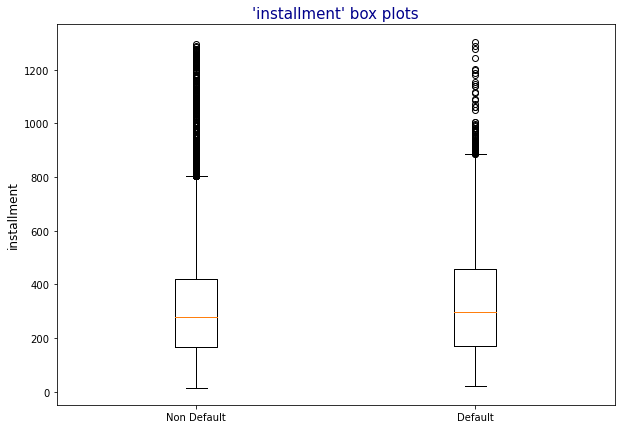

In [134]:
box_plot("installment")

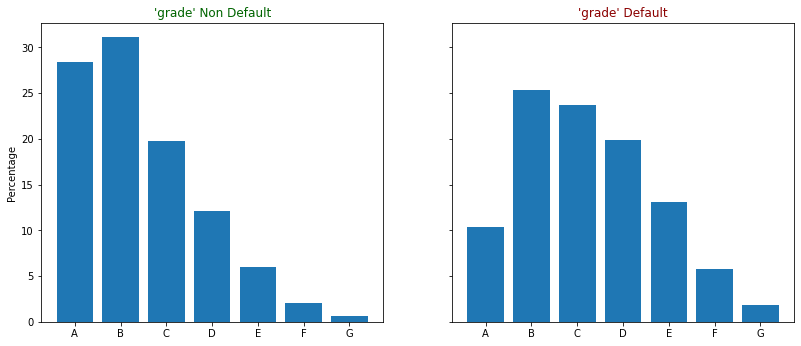

In [162]:
bar_chart("grade", save=True)

#### Default has more percentage of applicants in lower grades as compared to Non Default which means that lower the grade, more likely to be defaulter

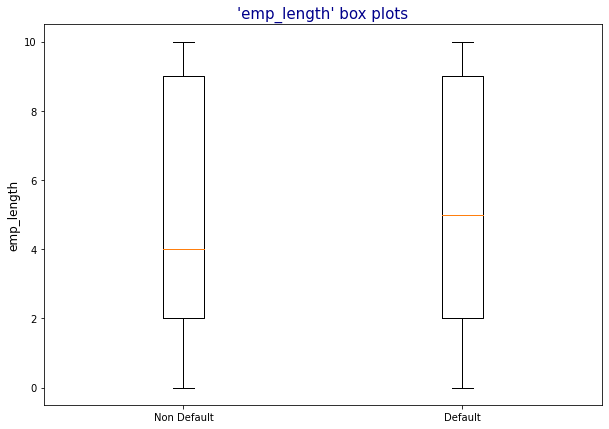

In [164]:
box_plot("emp_length")

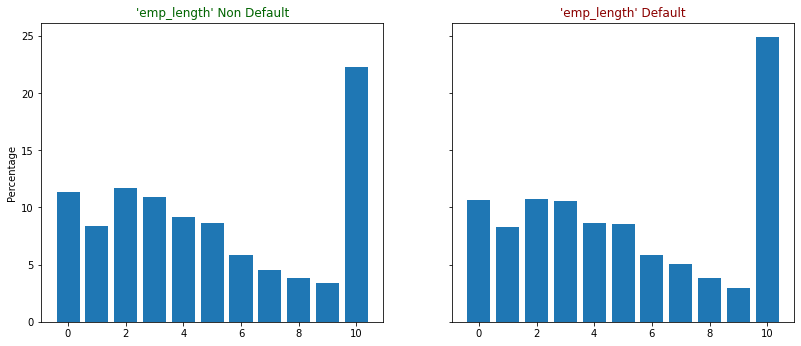

In [165]:
bar_chart("emp_length")

#### To my surprise, emp_length is a poor indicator of default.

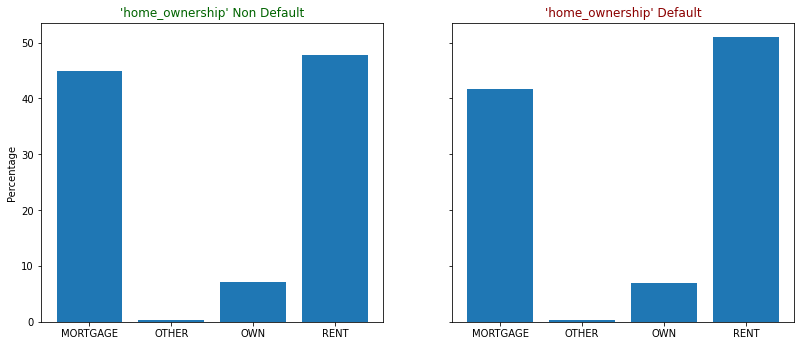

In [197]:
bar_chart("home_ownership")

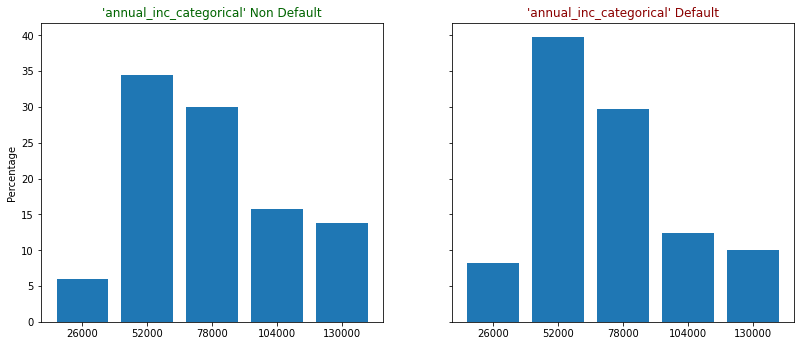

In [211]:
bar_chart("annual_inc_categorical")

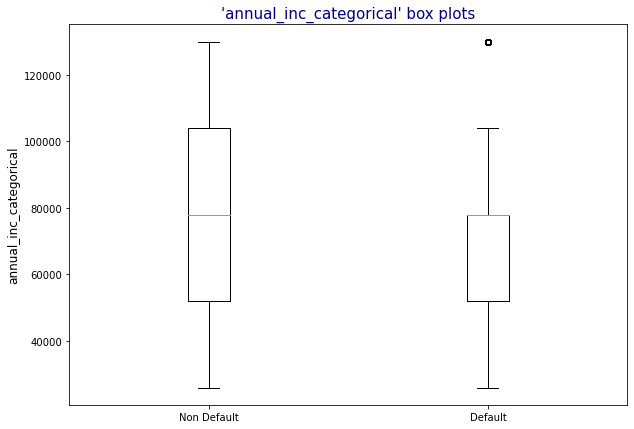

In [210]:
box_plot("annual_inc_categorical", save= True)

#### Non default has more percentage of applicants in higher income slabs as compared to Defaulters. 

In [216]:
data_uni.head(1)

,loan_amnt,funded_amnt,term,int_rate_percent,installment,grade,emp_length,home_ownership,annual_inc_categorical,verification_status,issue_d_month,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line_year,inq_last_6mths,open_acc,total_acc,pub_rec,revol_bal_categorical,revol_util,pub_rec_bankruptcies,loan_status
0,2500,2500,60 months,15.27,59.83,C,0,RENT,52000,Source Verified,12,car,GA,1.0,0,1999,5,3,4,0,10000,9.4,0.0,Charged Off


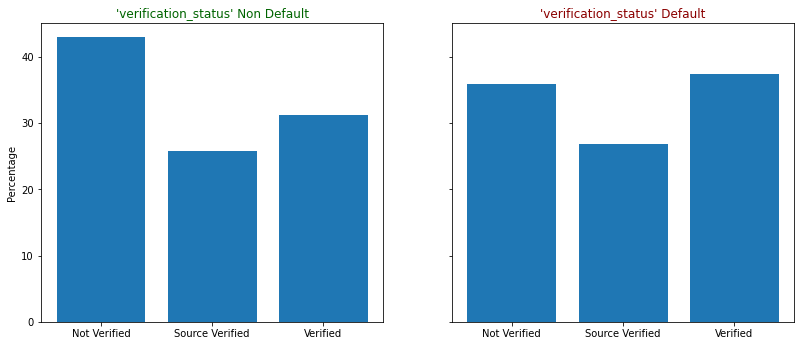

In [213]:
bar_chart("verification_status")

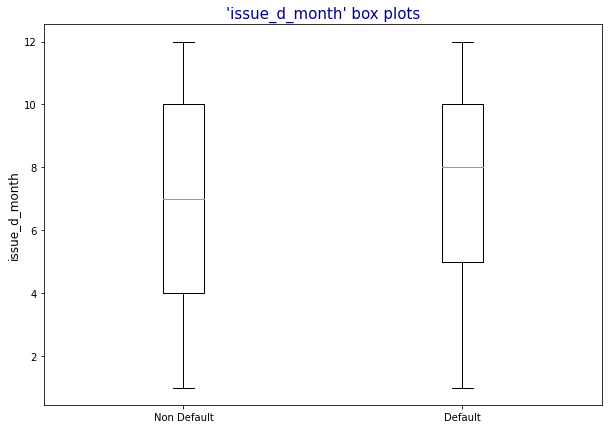

In [214]:
box_plot("issue_d_month")

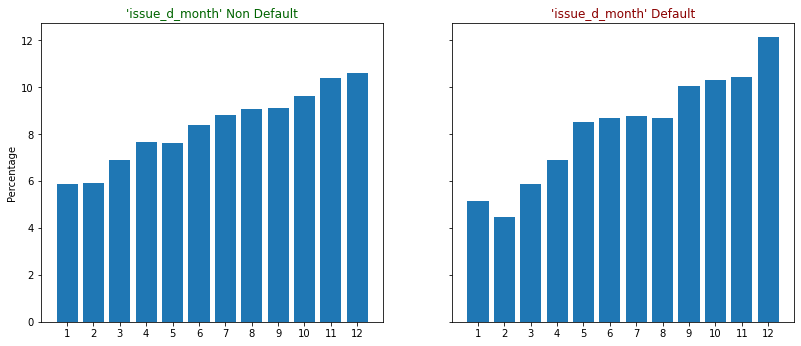

In [215]:
bar_chart("issue_d_month")

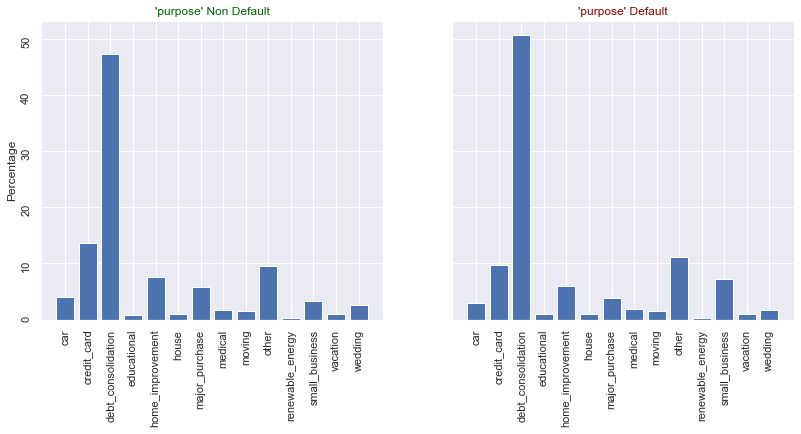

In [258]:
bar_chart("purpose", save=True)

#### 'debt_consolidation', 'other' and 'small_business' have higher percentage in default as compared to non default. So, lenders to pay special attention to borrowers with these 3 purposes

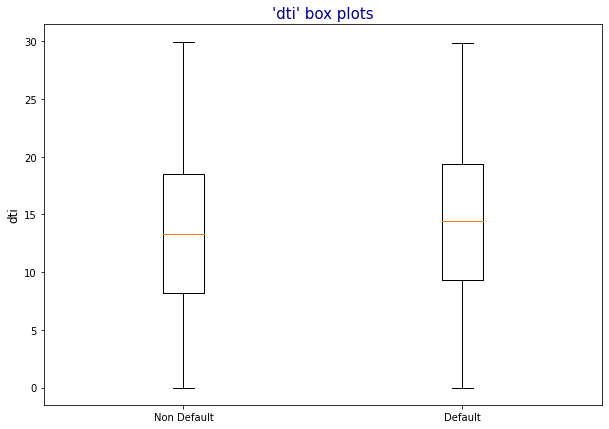

In [273]:
box_plot("dti")

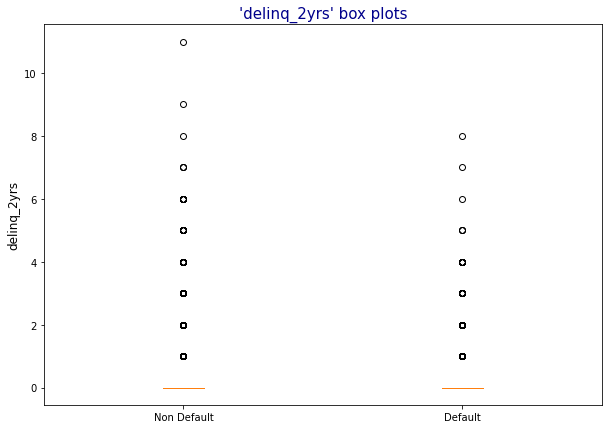

In [276]:
box_plot("delinq_2yrs")

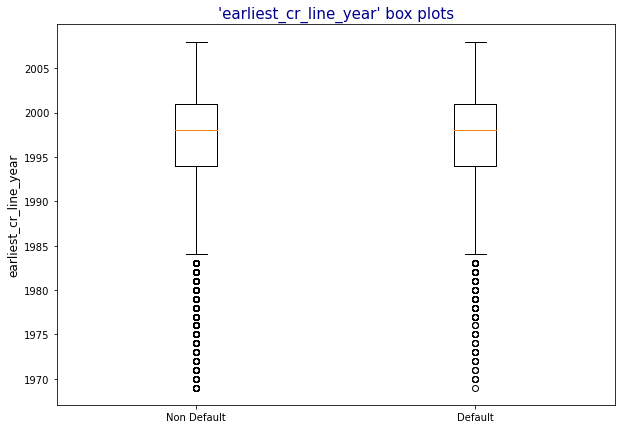

In [278]:
box_plot("earliest_cr_line_year")

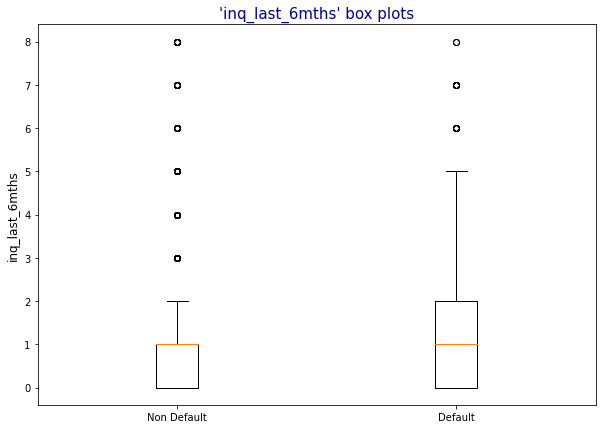

In [284]:
box_plot("inq_last_6mths", save= True)

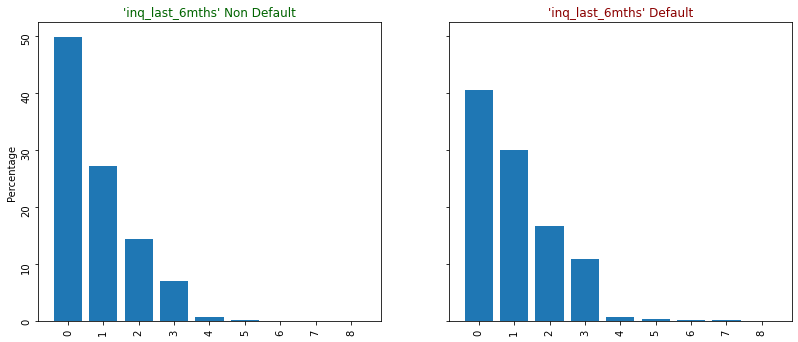

In [283]:
bar_chart("inq_last_6mths")

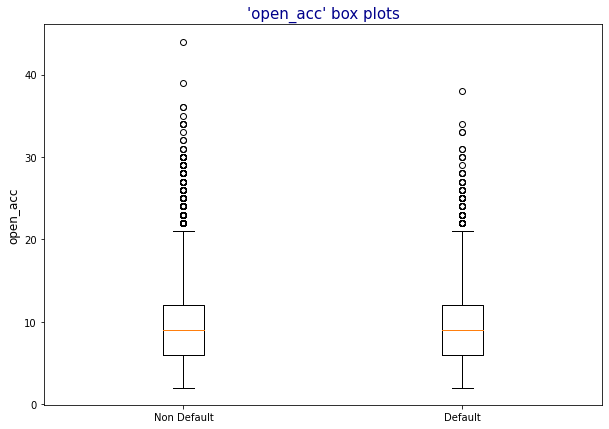

In [285]:
box_plot("open_acc")

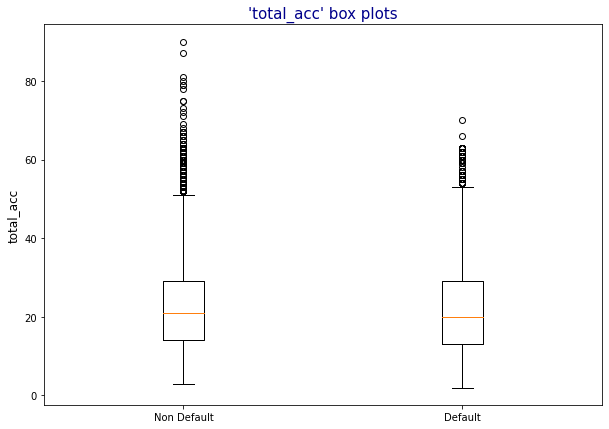

In [289]:
box_plot("total_acc")

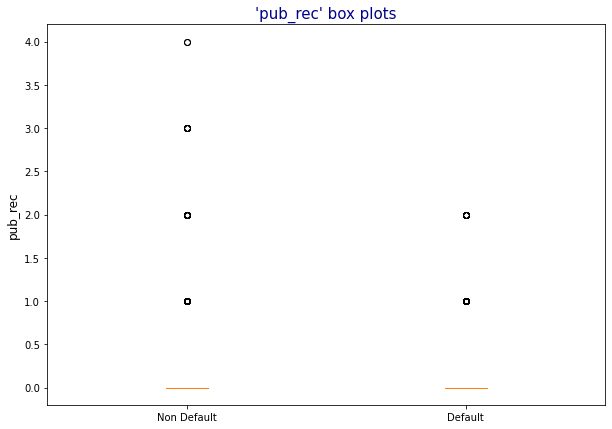

In [290]:
box_plot("pub_rec")

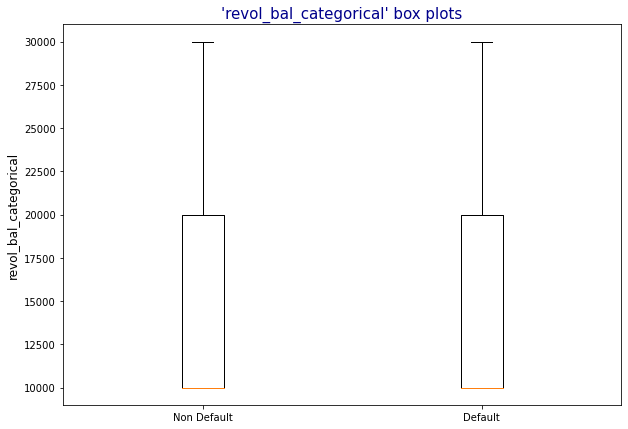

In [291]:
box_plot("revol_bal_categorical")

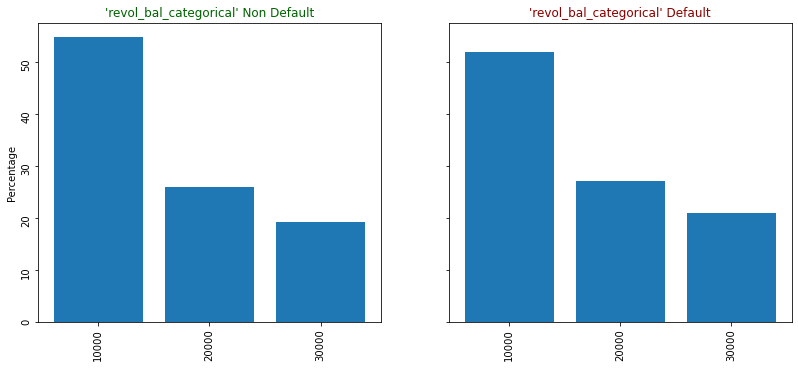

In [292]:
bar_chart("revol_bal_categorical")

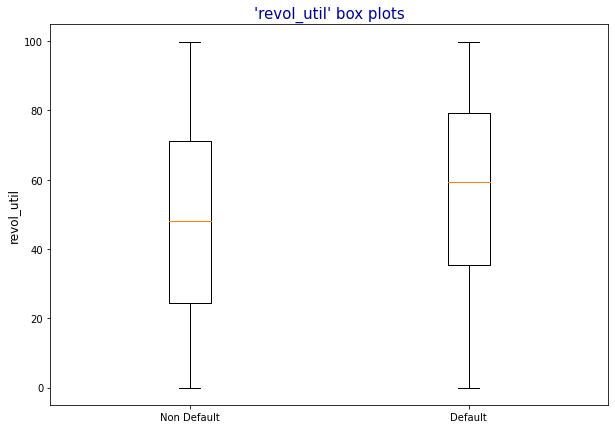

In [294]:
box_plot("revol_util")

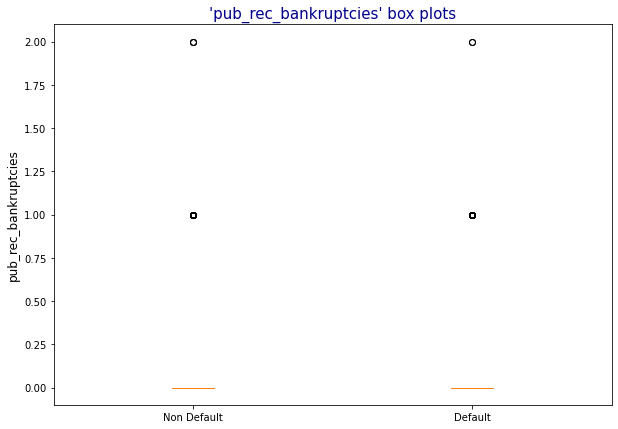

In [295]:
box_plot("pub_rec_bankruptcies")

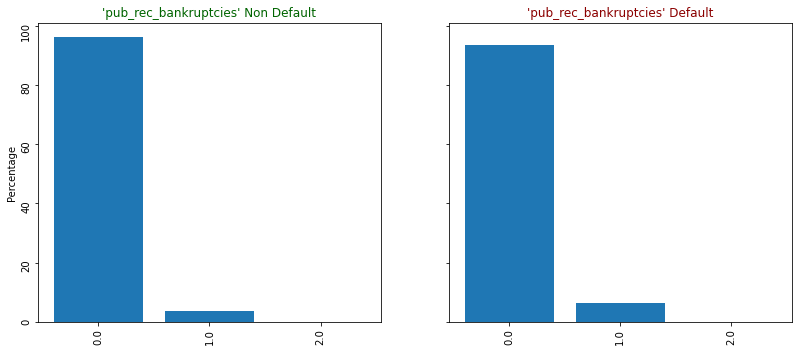

In [296]:
bar_chart("pub_rec_bankruptcies")

### Important observations from segmented univariate analysis:-
- interest rate median for default is noticably higher as compared to non default
- default has more percentage of applicants in higher grades as compared to non default which means that higher the grade, more likely to be defaulter
- non default has more percentage of applicants in higher income slabs as compared to defaulters
- Following categories of 'purpose' have higher percentage in default as compared to non default so lenders should pay special attention to loan application having these purposes-
    - debt_consolidation
    - other
    - small business

In [323]:
data_uni.to_csv("data_bi.csv")

### Step 4: Bivariate Analysis

In [4]:
data_uni = pd.read_csv("data_bi.csv")

In [7]:
data_uni.drop(columns="Unnamed: 0", inplace=True)

In [8]:
data_uni.head(1)

,loan_amnt,funded_amnt,term,int_rate_percent,installment,grade,emp_length,home_ownership,annual_inc_categorical,verification_status,issue_d_month,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line_year,inq_last_6mths,open_acc,total_acc,pub_rec,revol_bal_categorical,revol_util,pub_rec_bankruptcies,loan_status
0,2500,2500,60 months,15.27,59.83,C,0,RENT,52000,Source Verified,12,car,GA,1.0,0,1999,5,3,4,0,10000,9.4,0.0,Charged Off


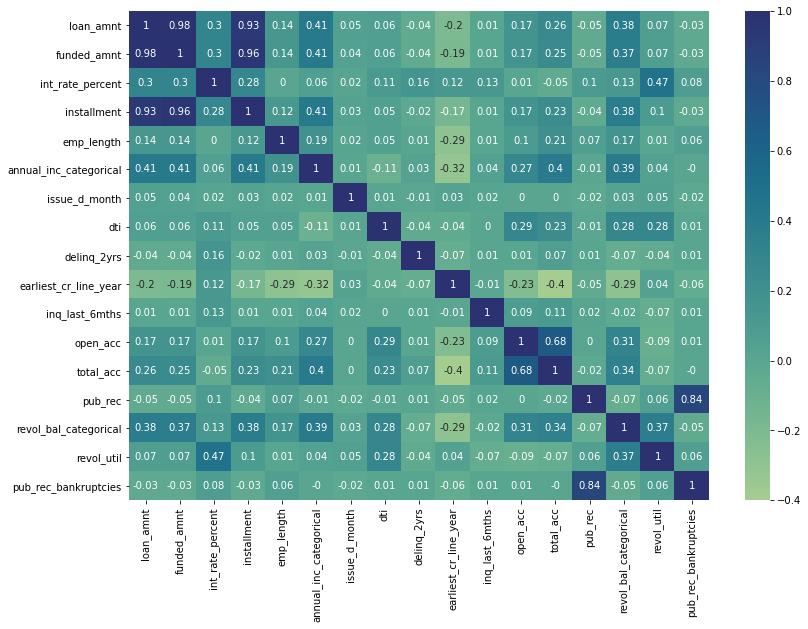

In [9]:
corr_mat = data_uni.corr()
corr_mat = round(corr_mat, 2)
plt.figure(figsize=[13, 9])
sns.heatmap(corr_mat, cmap='crest', annot=True)
plt.show()

In [11]:
data_uni.head(1)

,loan_amnt,funded_amnt,term,int_rate_percent,installment,grade,emp_length,home_ownership,annual_inc_categorical,verification_status,issue_d_month,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line_year,inq_last_6mths,open_acc,total_acc,pub_rec,revol_bal_categorical,revol_util,pub_rec_bankruptcies,loan_status
0,2500,2500,60 months,15.27,59.83,C,0,RENT,52000,Source Verified,12,car,GA,1.0,0,1999,5,3,4,0,10000,9.4,0.0,Charged Off


In [241]:
def scatter_plot(X, Y, h=None, save=False):
    sns.scatterplot(x=X, y=Y, data=data_uni, hue=h)
    plt.title(f"\'{X}\' and \'{Y}\' scatterplot", fontdict={'fontsize':15, 'fontweight':5, 'color':'darkblue'})
    if (save == True):
        plt.savefig(f"{X}_{Y}_sp.png")
    plt.show()
    
def box_plot(X, Y, h=None, save=False):
    sns.boxplot(x=X, y=Y, data=data_uni, hue=h, order=sorted(data_uni[X].unique()))
    plt.title(f"\'{X}\' and \'{Y}\' boxplot", fontdict={'fontsize':15, 'fontweight':5, 'color':'darkblue'})
#     plt.xticks(rotation=90)
    if (save==True):
        plt.savefig(f"{X}_{Y}_bp.png")
    plt.show()

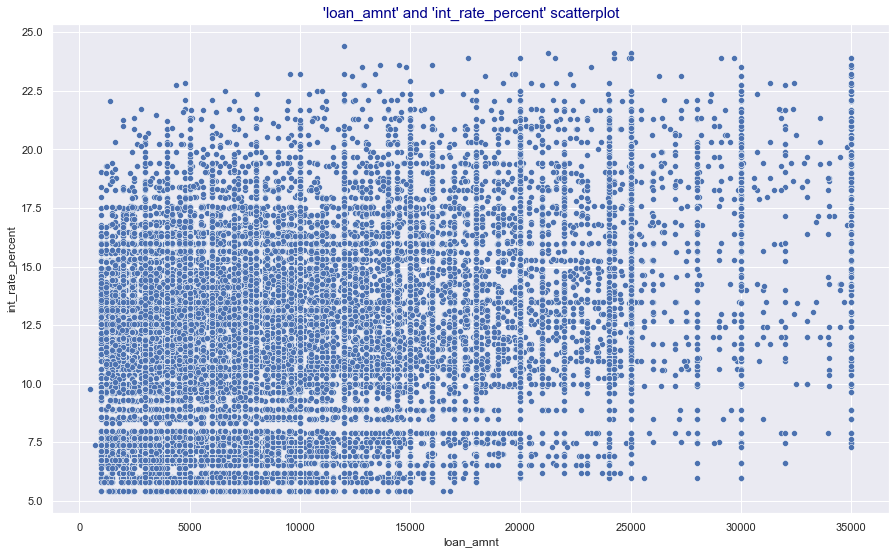

In [92]:
scatter_plot("loan_amnt", "int_rate_percent")

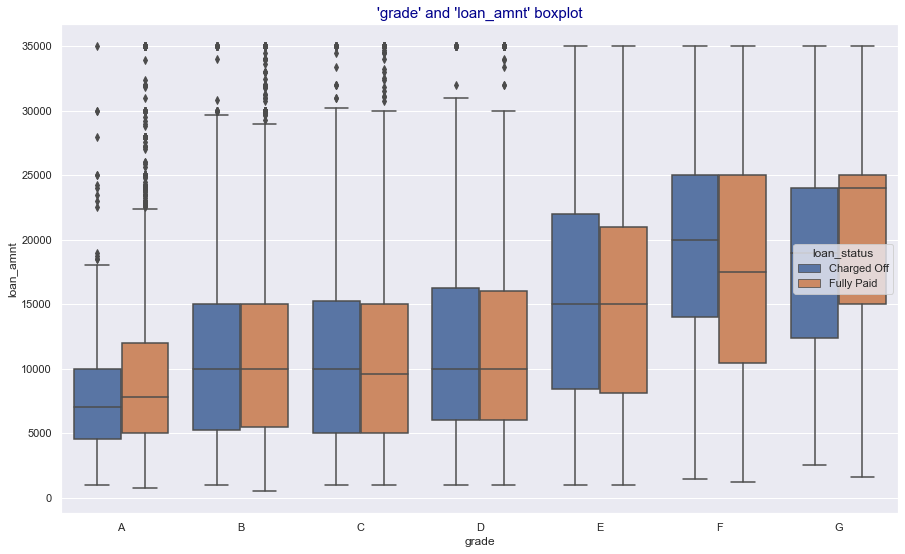

In [82]:
box_plot("grade", "loan_amnt", "loan_status", save=True)

- higher the grade, more is the loan amount
- higher the grade, more likely to be a defaulter

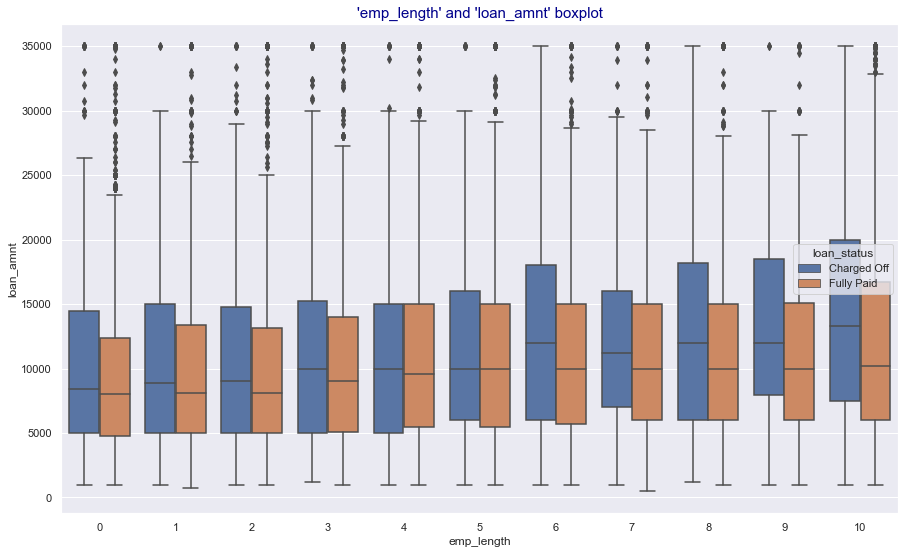

In [96]:
box_plot("emp_length", "loan_amnt", "loan_status", save=True)

- at every emp_length value, the loan_amnt of defaulters is greater than or equal to that of non defaulters
- this suggests that, more the loan amount, more likely to be default

In [98]:
data_uni.head(1)

,loan_amnt,funded_amnt,term,int_rate_percent,installment,grade,emp_length,home_ownership,annual_inc_categorical,verification_status,issue_d_month,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line_year,inq_last_6mths,open_acc,total_acc,pub_rec,revol_bal_categorical,revol_util,pub_rec_bankruptcies,loan_status
0,2500,2500,60 months,15.27,59.83,C,0,RENT,52000,Source Verified,12,car,GA,1.0,0,1999,5,3,4,0,10000,9.4,0.0,Charged Off


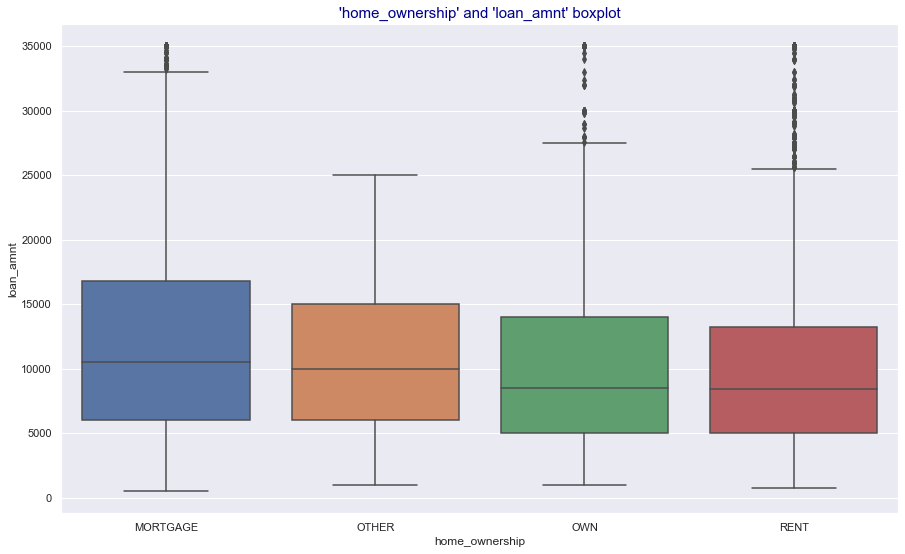

In [99]:
box_plot("home_ownership", "loan_amnt")

- lenders tend to give more loans to mortgage customers and less amount of loans are provided to people living on rent due to the securities provided by each of them

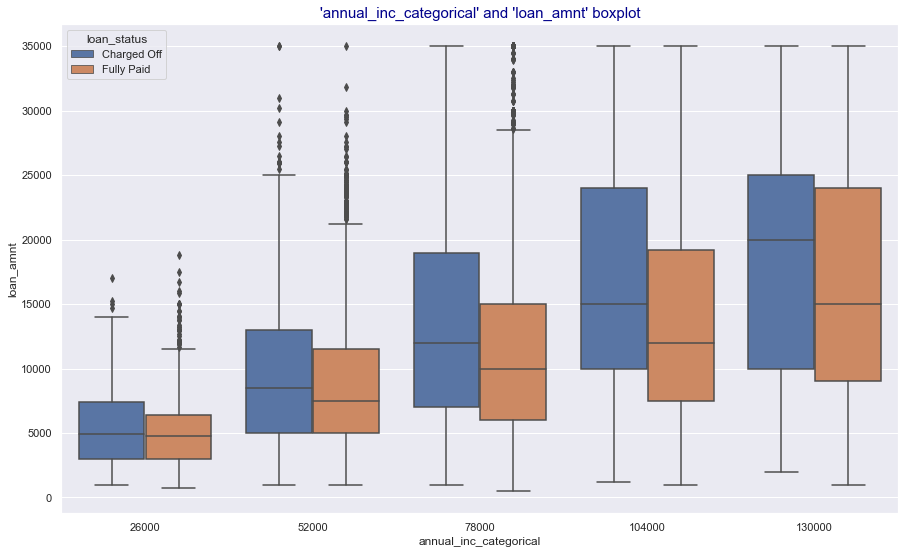

In [101]:
box_plot("annual_inc_categorical", "loan_amnt", "loan_status")

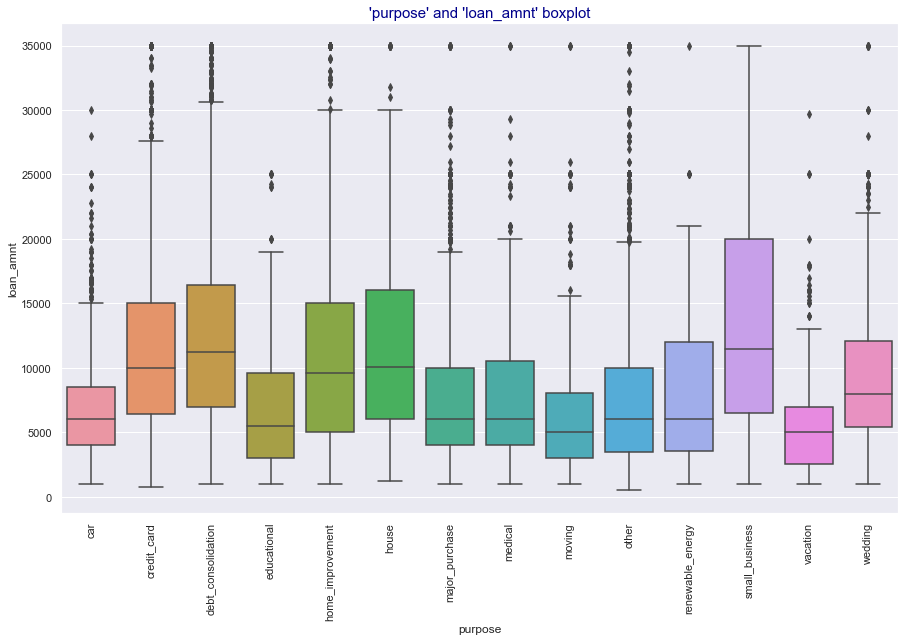

In [109]:
box_plot("purpose", "loan_amnt", save=True)

- 'debt_consolidation' and 'small_business' account for highest amount of loans on average

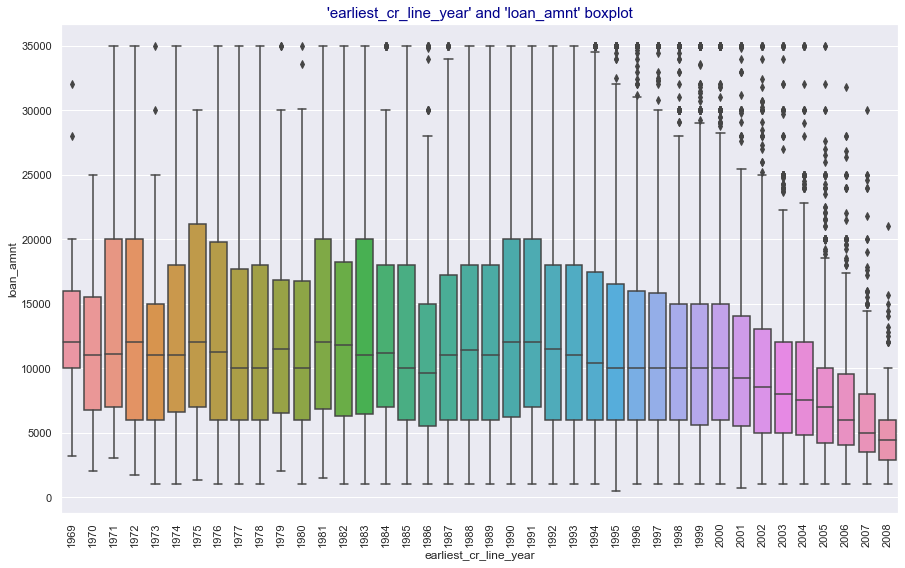

In [120]:
box_plot("earliest_cr_line_year", "loan_amnt", save=True)

- customers having earliest credit line after 2000 are getting lower amount of loans because these applications don't have a big credit history to look at so they are risky.

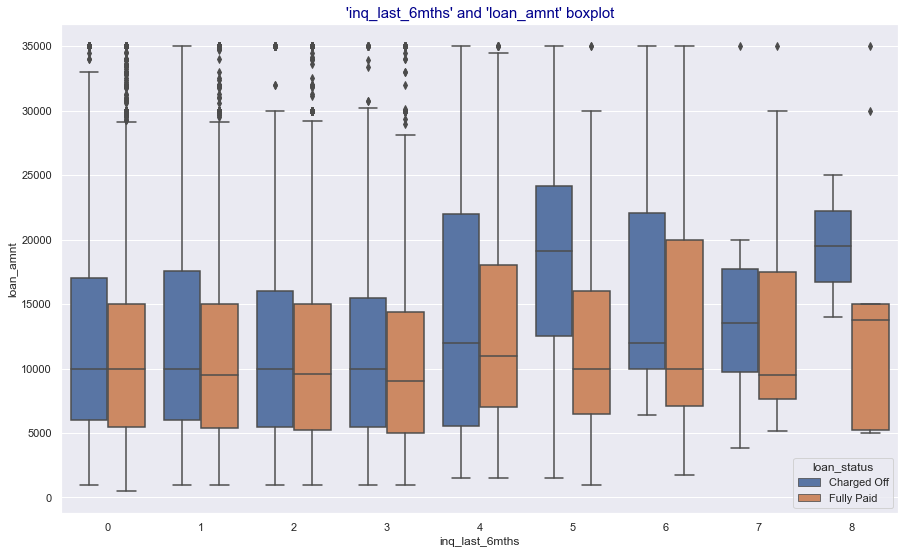

In [128]:
box_plot("inq_last_6mths", "loan_amnt", "loan_status", save=True)

- more the inquiries in last 6 months, more the loan amount given to them
- surprisingly, more the inquiries, more the chances of default and the difference is huge at 5 and 8 inquiries

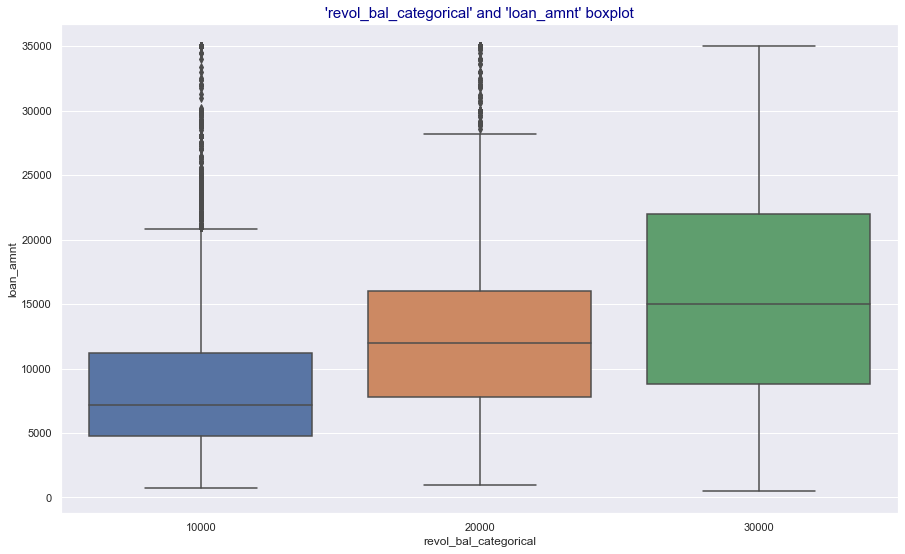

In [133]:
box_plot("revol_bal_categorical", "loan_amnt")

In [137]:
data_uni.head(1)

,loan_amnt,funded_amnt,term,int_rate_percent,installment,grade,emp_length,home_ownership,annual_inc_categorical,verification_status,issue_d_month,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line_year,inq_last_6mths,open_acc,total_acc,pub_rec,revol_bal_categorical,revol_util,pub_rec_bankruptcies,loan_status
0,2500,2500,60 months,15.27,59.83,C,0,RENT,52000,Source Verified,12,car,GA,1.0,0,1999,5,3,4,0,10000,9.4,0.0,Charged Off


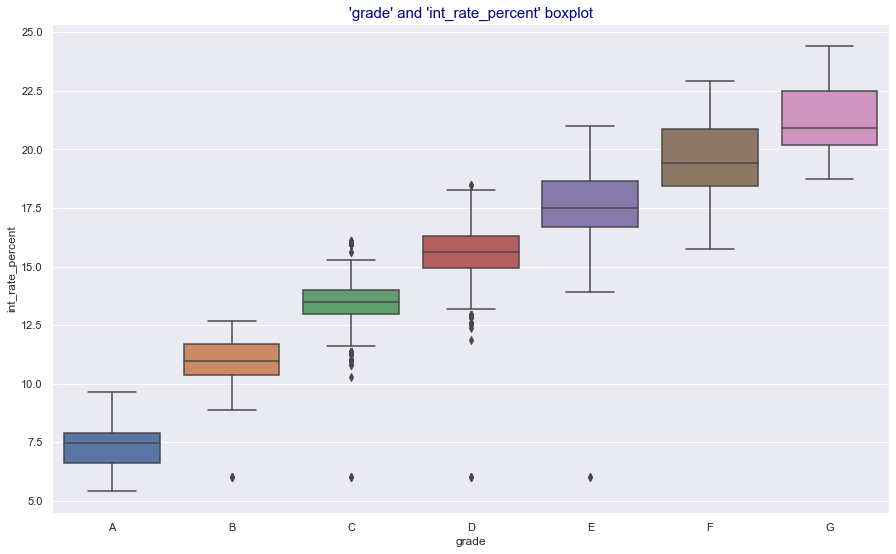

In [162]:
box_plot("grade", "int_rate_percent", save=True)

- higher the grade, more the interest rate of the loan

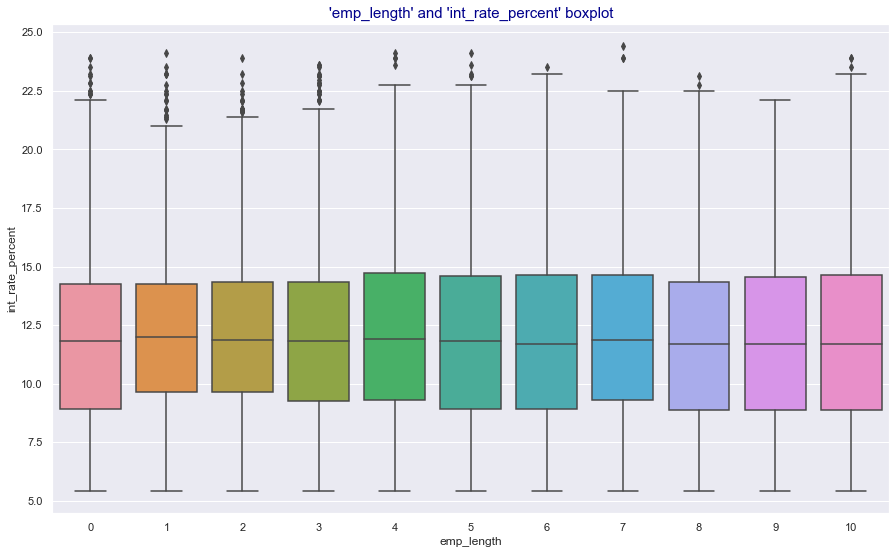

In [164]:
box_plot("emp_length", "int_rate_percent")

In [165]:
data_uni.head(1)

,loan_amnt,funded_amnt,term,int_rate_percent,installment,grade,emp_length,home_ownership,annual_inc_categorical,verification_status,issue_d_month,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line_year,inq_last_6mths,open_acc,total_acc,pub_rec,revol_bal_categorical,revol_util,pub_rec_bankruptcies,loan_status
0,2500,2500,60 months,15.27,59.83,C,0,RENT,52000,Source Verified,12,car,GA,1.0,0,1999,5,3,4,0,10000,9.4,0.0,Charged Off


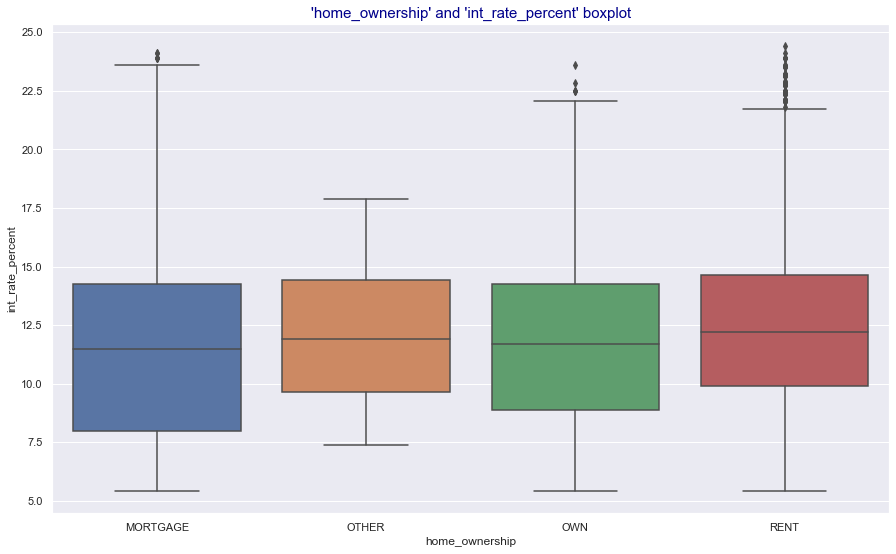

In [166]:
box_plot("home_ownership", "int_rate_percent")

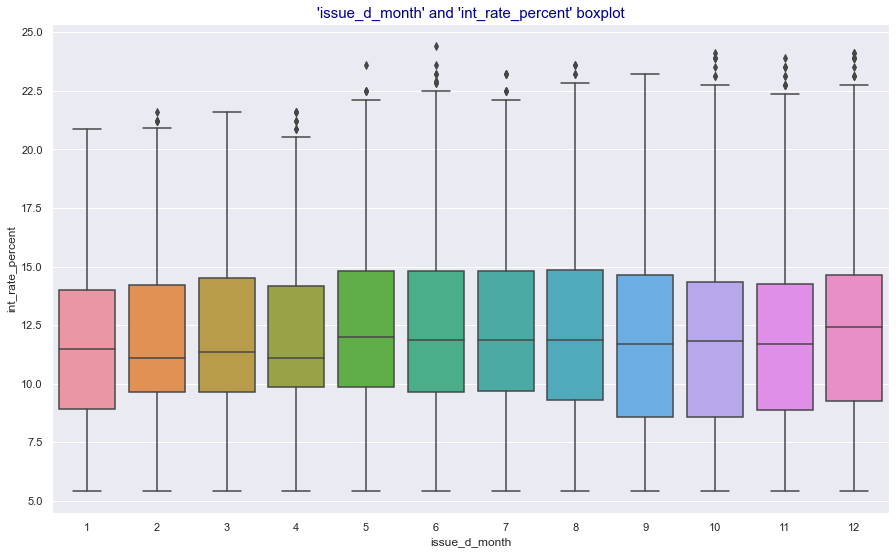

In [168]:
box_plot("issue_d_month", "int_rate_percent")

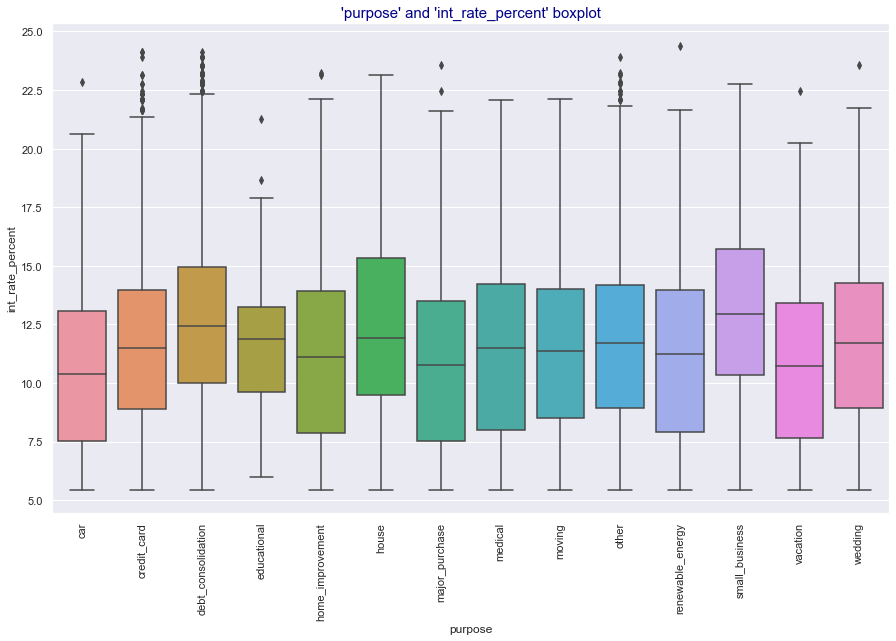

In [173]:
box_plot("purpose", "int_rate_percent", save=True)

- debt_consolidation, house and small_business have highest interest rates on average

In [175]:
data_uni.head(1)

,loan_amnt,funded_amnt,term,int_rate_percent,installment,grade,emp_length,home_ownership,annual_inc_categorical,verification_status,issue_d_month,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line_year,inq_last_6mths,open_acc,total_acc,pub_rec,revol_bal_categorical,revol_util,pub_rec_bankruptcies,loan_status
0,2500,2500,60 months,15.27,59.83,C,0,RENT,52000,Source Verified,12,car,GA,1.0,0,1999,5,3,4,0,10000,9.4,0.0,Charged Off


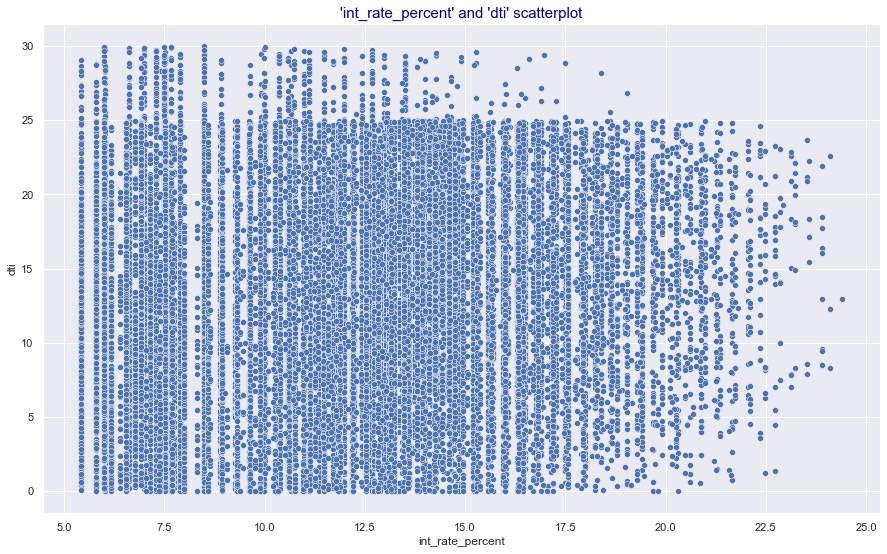

In [177]:
scatter_plot("int_rate_percent", "dti", save=True)

- dti above 25 have very few loans with interest rate above 13 percent

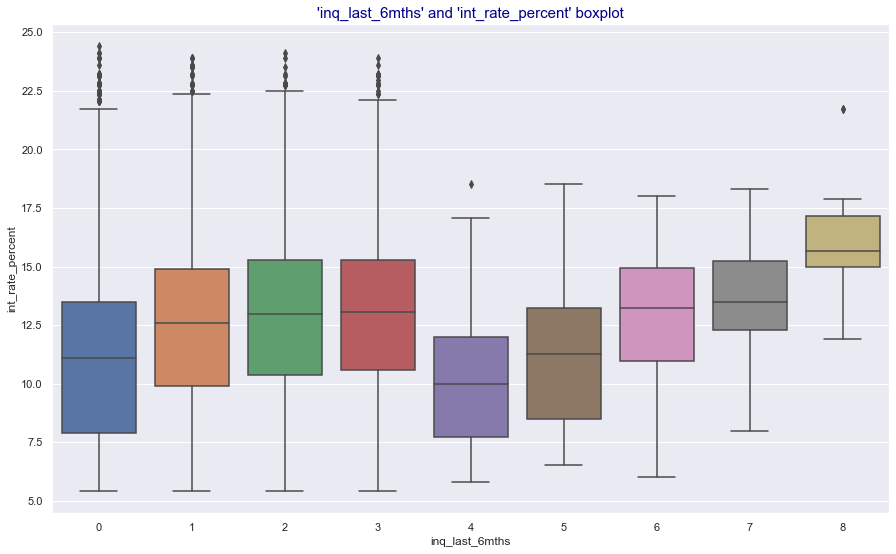

In [180]:
box_plot("inq_last_6mths", "int_rate_percent", save=True)

- interest rate suddenly drops at 4 inquiries and then rise again with less and less spread after that

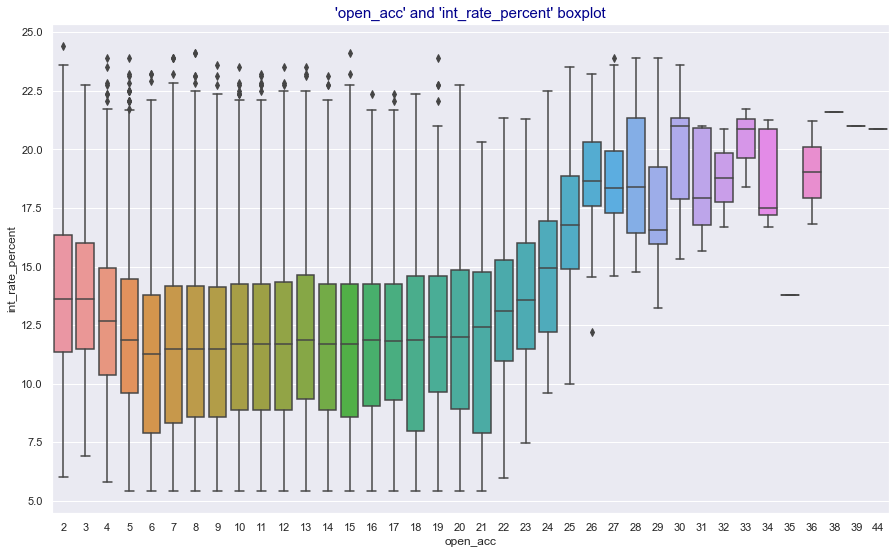

In [183]:
box_plot("open_acc", "int_rate_percent", save=True)

- the interest rate rise steadily for customers having more than 20 open accounts, approximately

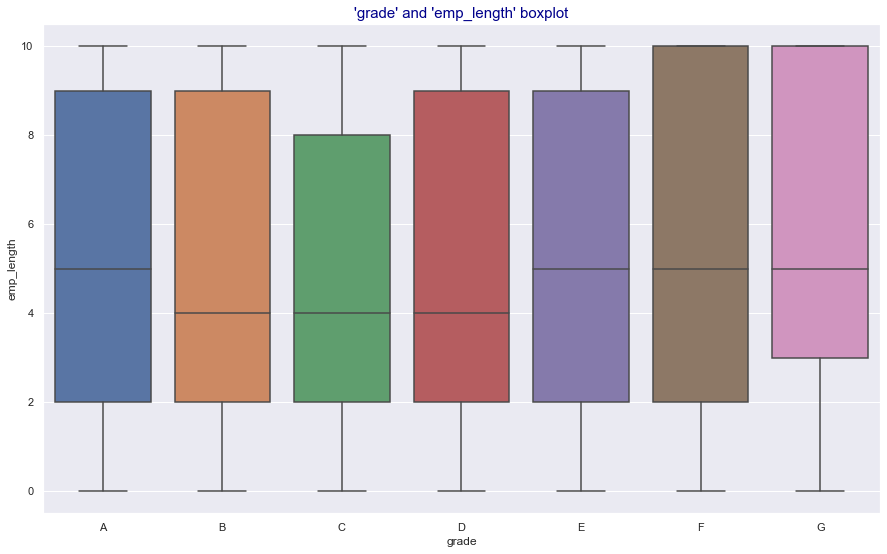

In [189]:
box_plot("grade", "emp_length")

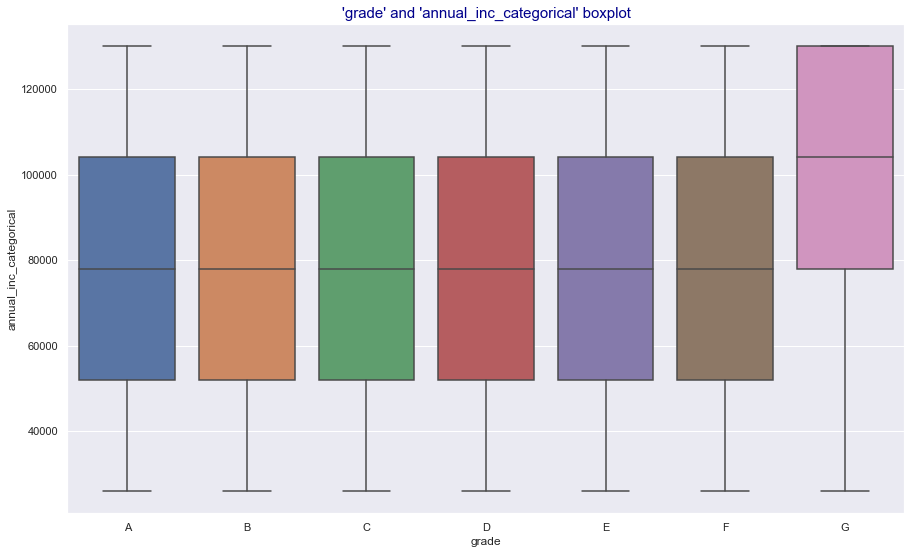

In [191]:
box_plot("grade", "annual_inc_categorical", save=True)

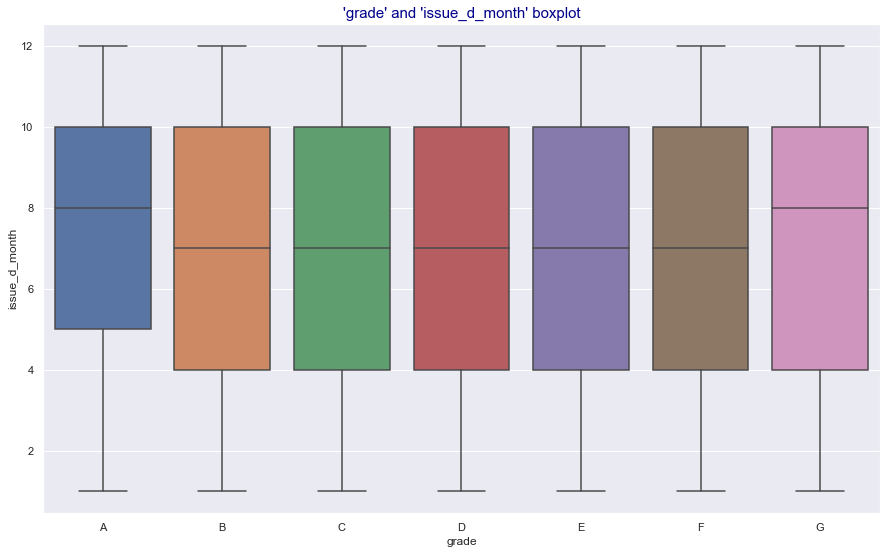

In [192]:
box_plot("grade", "issue_d_month")

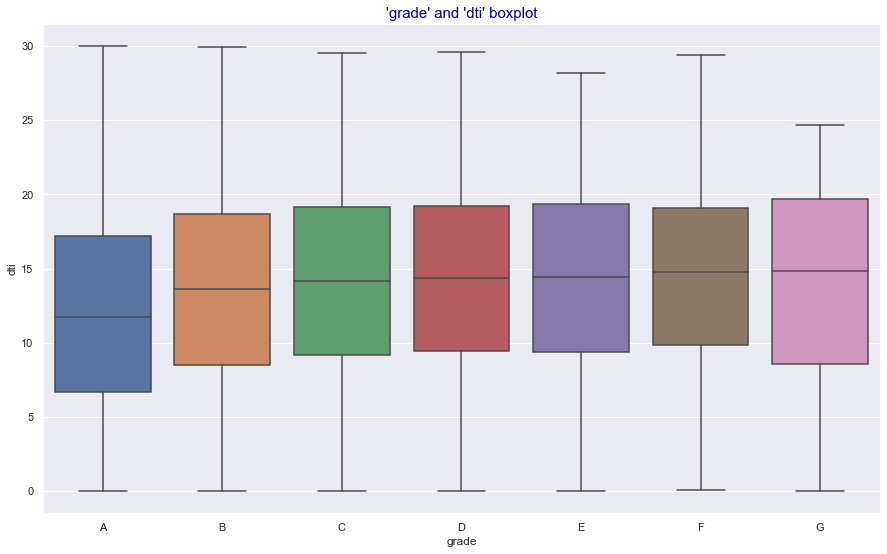

In [193]:
box_plot("grade", "dti")

In [194]:
data_uni.head(1)

,loan_amnt,funded_amnt,term,int_rate_percent,installment,grade,emp_length,home_ownership,annual_inc_categorical,verification_status,issue_d_month,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line_year,inq_last_6mths,open_acc,total_acc,pub_rec,revol_bal_categorical,revol_util,pub_rec_bankruptcies,loan_status
0,2500,2500,60 months,15.27,59.83,C,0,RENT,52000,Source Verified,12,car,GA,1.0,0,1999,5,3,4,0,10000,9.4,0.0,Charged Off


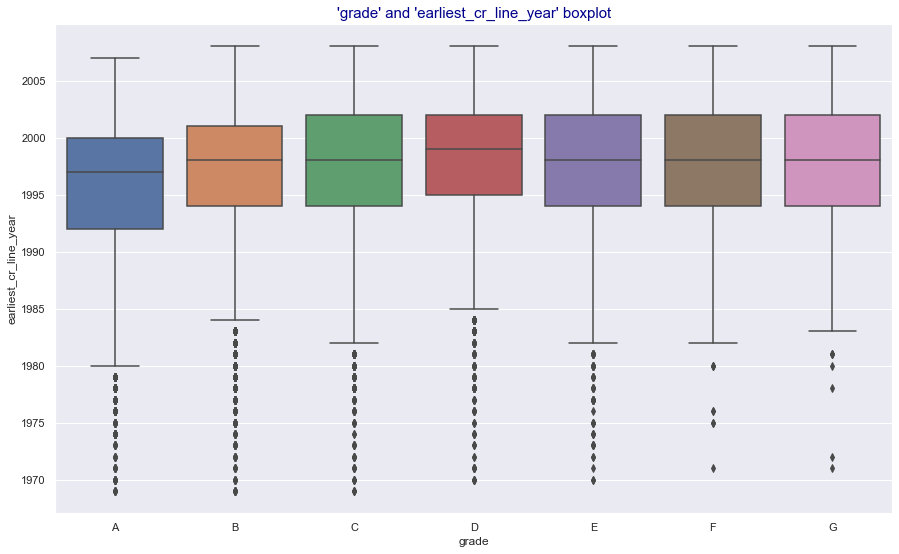

In [197]:
box_plot("grade", "earliest_cr_line_year")

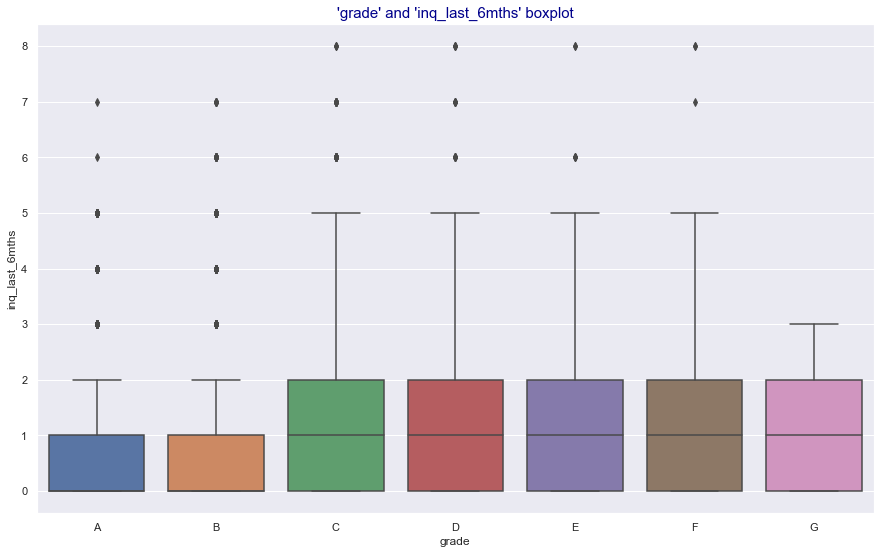

In [198]:
box_plot("grade", "inq_last_6mths")

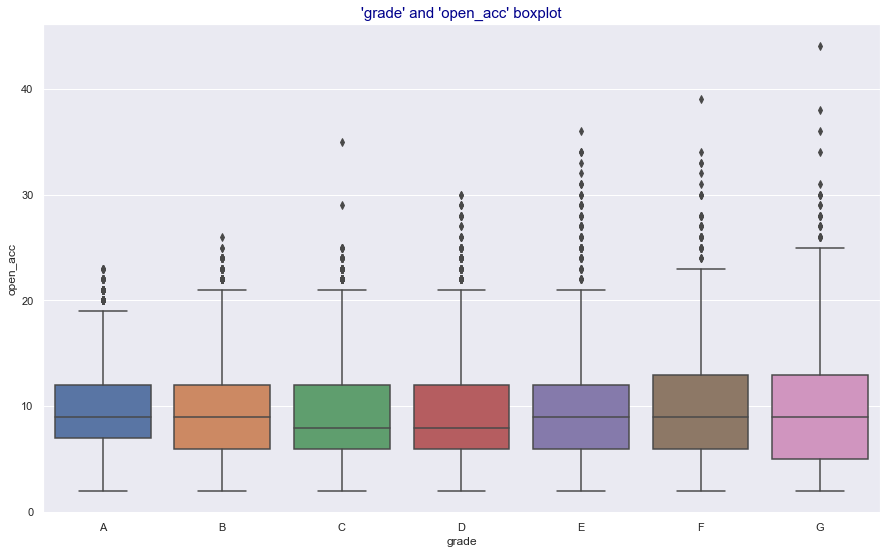

In [199]:
box_plot("grade", "open_acc")

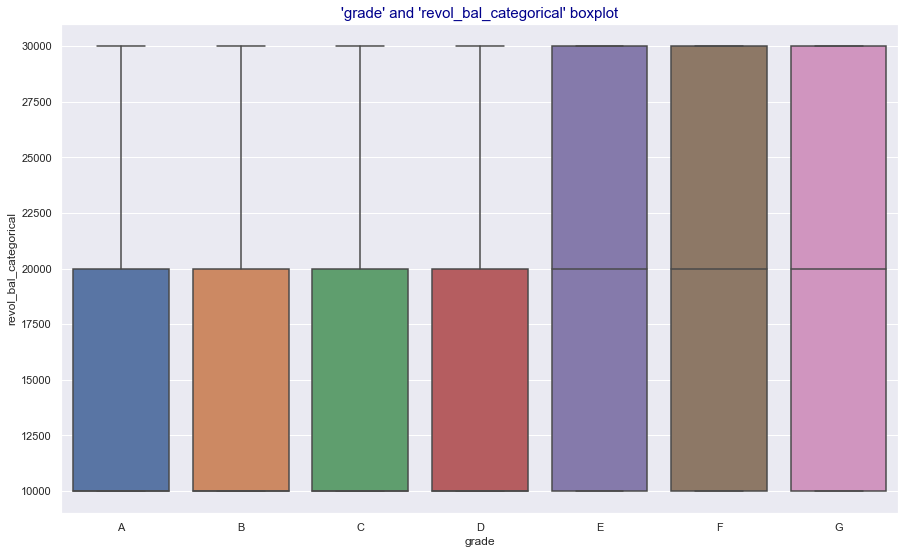

In [202]:
box_plot("grade", "revol_bal_categorical", save=True)

- grades 'E', 'F', and 'G' have much higher revolving balance on average than grades 'A' to 'D'

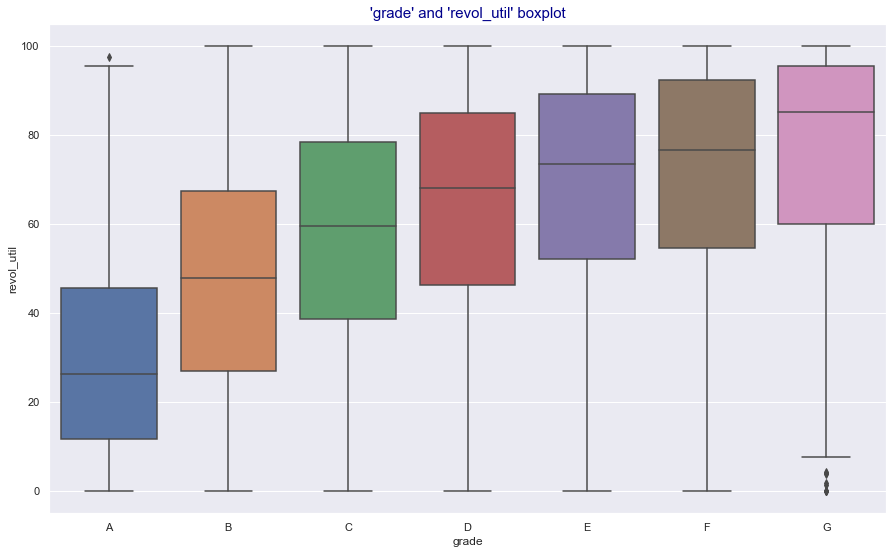

In [204]:
box_plot("grade", "revol_util", save=True)

- revolving balance utilization rate increases steadily with grade

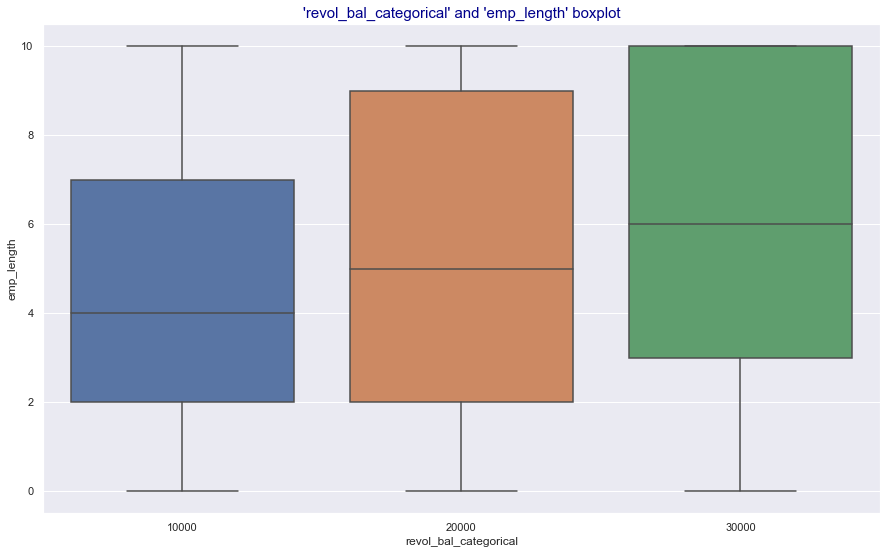

In [214]:
box_plot("revol_bal_categorical", "emp_length", save=True)

- more expercience borrowers have more revolving balance

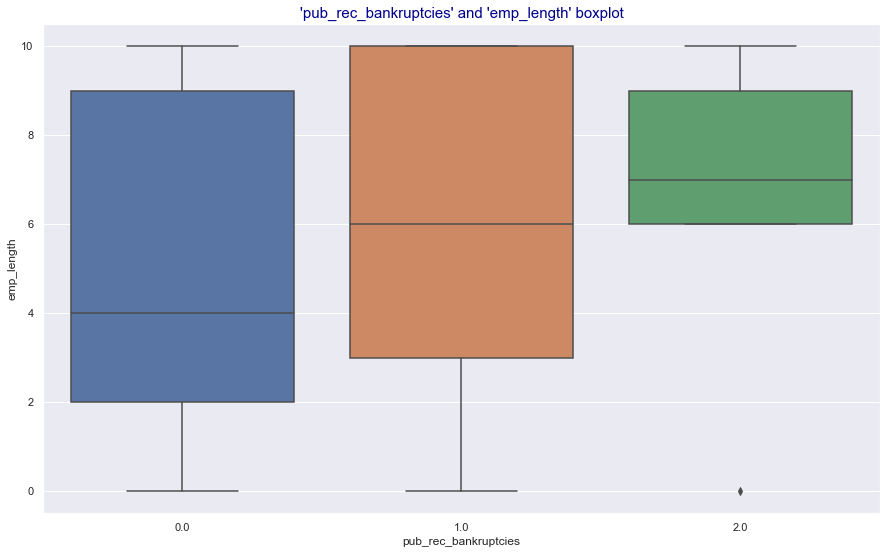

In [216]:
box_plot("pub_rec_bankruptcies", "emp_length")

In [218]:
data_uni.head(1)

,loan_amnt,funded_amnt,term,int_rate_percent,installment,grade,emp_length,home_ownership,annual_inc_categorical,verification_status,issue_d_month,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line_year,inq_last_6mths,open_acc,total_acc,pub_rec,revol_bal_categorical,revol_util,pub_rec_bankruptcies,loan_status
0,2500,2500,60 months,15.27,59.83,C,0,RENT,52000,Source Verified,12,car,GA,1.0,0,1999,5,3,4,0,10000,9.4,0.0,Charged Off


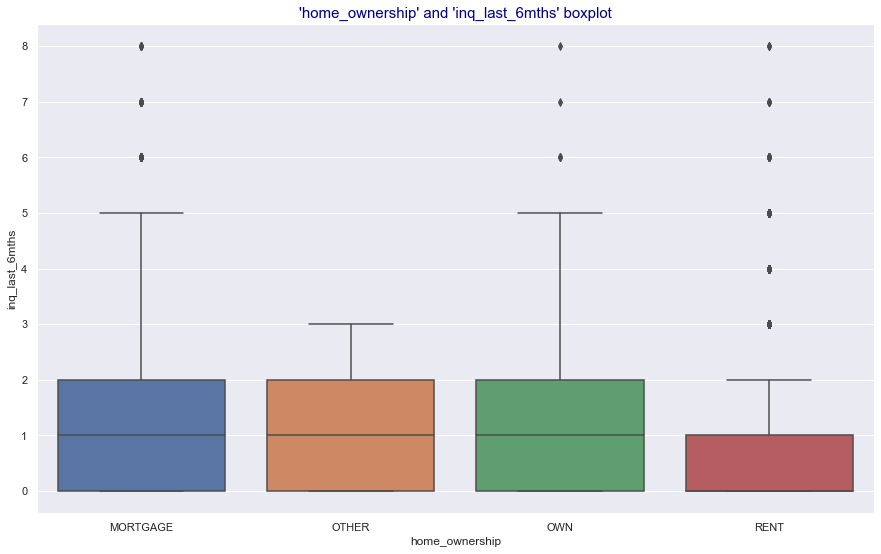

In [225]:
box_plot("home_ownership", "inq_last_6mths", save=True)

- OWN and MORTGAGE have more average inquiries compared to OTHER and RENT have lowest average inquiries

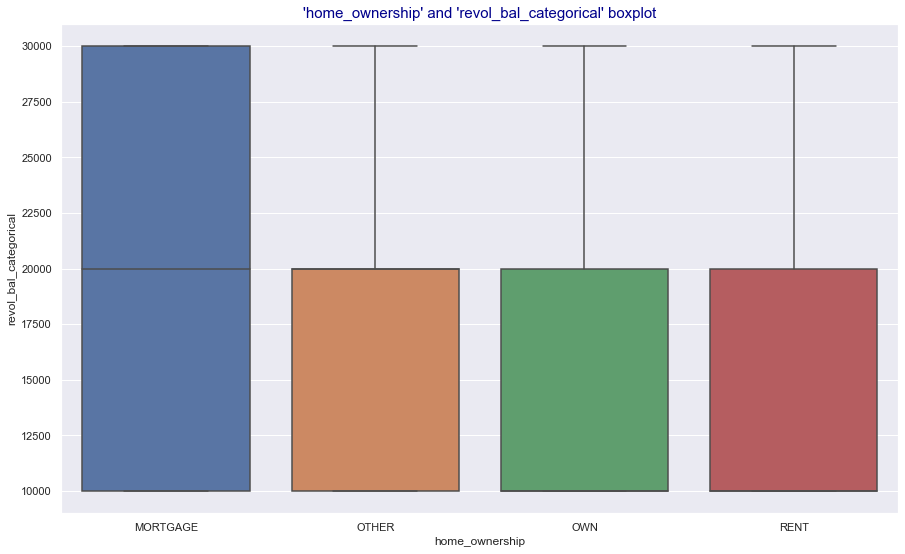

In [227]:
box_plot("home_ownership", "revol_bal_categorical", save=True)

- MORTGAGE's revolving balance have largest IQR

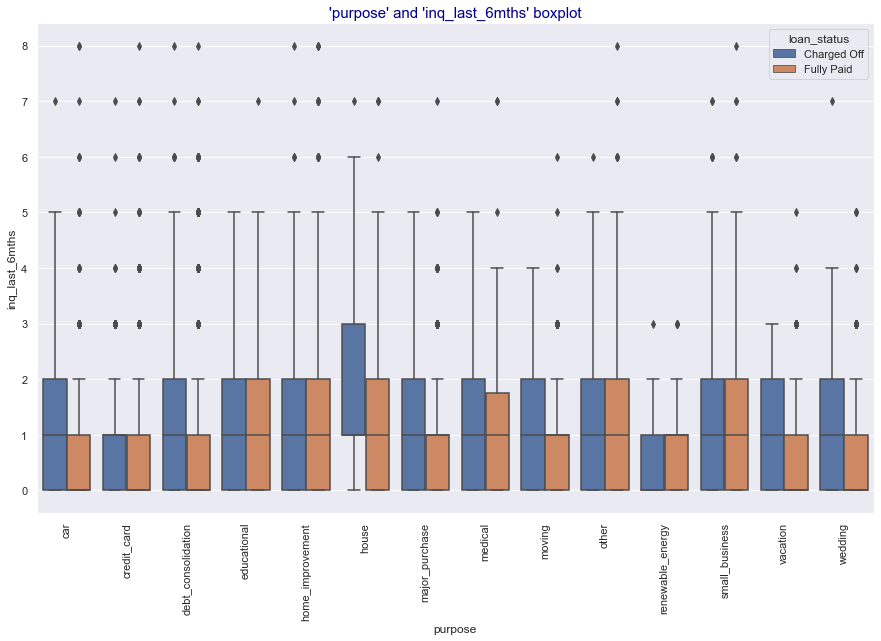

In [235]:
box_plot("purpose", "inq_last_6mths", "loan_status", save=True)

- education, home_improvement, house, other and small_business have more number of inquiries
- inquiries for default is greater than or equal to non default for all purposes

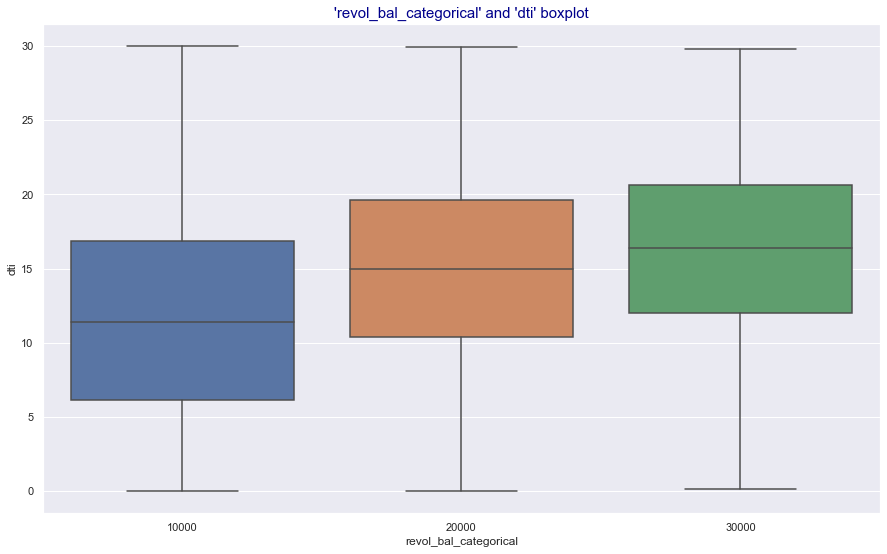

In [242]:
box_plot("revol_bal_categorical", "dti", save=True)

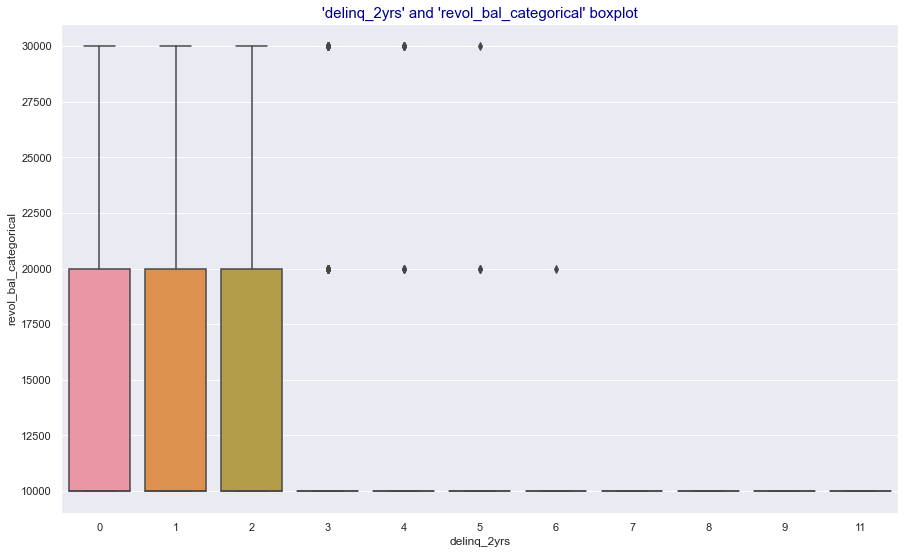

In [248]:
box_plot("delinq_2yrs", "revol_bal_categorical", save=True)

- 0 to 2 delinquency have almost double the revolving balance as compared to 3 to 11

### Important observations from bivariate analysis:-
- higher the grade, more is the loan amount
- higher the grade, more likely to be a defaulter
- at every emp_length value, the loan_amnt of defaulters is greater than or equal to that of non defaulters
- lenders tend to give more loans to 'MORTGAGE' customers compared to other home_ownership categories
- 'debt_consolidation' and 'small_business' purposes account for highest amount of loans on average
- customers having earliest credit line after 2000 are getting lower amount of loans
- more the inquiries in last 6 months, more the loan amount given to them
- more the inquiries, more the chances of default and the difference is huge at 5 and 8 inquiries
- higher the grade, more the interest rate of the loan
- 'debt_consolidation', 'house' and 'small_business' purposes have highest interest rates on average
- dti above 25 have very few loans with interest rate above 13 percent
- the interest rate rise steadily for customers having more than 20 open accounts, approximately
- higher the grade, more is the revolving balance
- higher the grade, more is the revolving balance utilization rate
- more expercience borrowers have more revolving balance
- In home_ownership, 'OWN' and 'MORTGAGE' have more average inquiries, relatively
- In purpose, 'education', 'home_improvement', 'house', 'other' and 'small_business' have more number of inquiries
- inquiries for default is greater than or equal to non default for all purposes
- lower delinquecy have more revolving balance and vice versa

### Strongest indicators of default:-
- 'interest_rate' - higher the interest rate, more the chances of default
- 'loan_amnt' - higher the loan amount, more the chances of default
- 'grade' - higher the grade, more the chances of default
- 'purpose' - Lender should pay special attention to 'debt_consolidation', 'other' and 'small_business' categories
- 'annual_inc_categorical' - lower the annual income, more likely to be a defaulter
- 'inq_last_6mths' - higher the inquiries, more the chances of default

If 3 or more of the above mentioned points are true for an applicant, he/she is very likely to be a defaulter.